## PROJECT NAME: INDIAN START-UP FUNDING DATA ANALYSIS

## Poject Description/Scenario
This project seeks to gain insight into the fundings received by start-ups companies in India between 2018 and 2021. And advice a team trying to venture into the Indian start-up ecosystem, by proposing the best course of action. This would be done by developing a unique story from this dataset, stating and testing a hypothesis, asking questions, perform analysis and share insights with relevant visualisations.

## Hypothesis
Null Hypothesis: There is significant difference in the funding patterns of Indian startups in the last few years.

Alternate Hypothesis: There is no significant difference in the funding patterns of Indian startups in the last few years.


## Business Questions
1. Which Industries/sectors received the most and least funding from investors?
2. What are the top five (5) cities with the most start-ups?
3. What are the top (10) start-ups with most funding?
4. Who are the leading or top investors in the Indian start-up ecosystem by number of investments made?
5. What is the trend of funding in the Indian start-up ecosystem?
6. What is the commonest investment/funding type?
7. Which stage of funding did start-ups receive the most funding?
8. Which investors invested the biggest funds in a particular field?

### Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import math
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Data Loading

In [2]:
funding_2018 = pd.read_csv("startup_funding2018.csv")
funding_2019 = pd.read_csv("startup_funding2019.csv")
funding_2020 = pd.read_csv("startup_funding2020.csv")
funding_2021 = pd.read_csv("startup_funding2021.csv")

### Exploring the 2018 dataset

In [3]:
# Description funds for 2018

funding_2018.head()

Company Name                                           Industry  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   

                                       About Company  
0  TheCollegeFever is a hub for fun, fiesta and f...  
1  A startup which aggregates milk from dairy far...  
2          Leading Online Loans Marketplace in India  
3  PayMe India is an innovative FinTech organizat...  
4  Eunimart is a one stop solution for merchants ...

### Checking the basic info of the dataset

In [4]:
# Checking the shape of the dataset

funding_2018.shape

print("The 2018 Funding data contains " ,funding_2018.shape[0], "rows and " ,funding_2018.shape[1], "columns")

The 2018 Funding data contains  526 rows and  6 columns


In [5]:
# Checking the info of the 2018 dataset

funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [6]:
# Checking brief description of the 2018 dataset

funding_2018.describe(include="all").transpose()

count unique                                                top  \
Company Name    526    525                                    TheCollegeFever   
Industry        526    405                                                  —   
Round/Series    526     21                                               Seed   
Amount          526    198                                                  —   
Location        526     50                        Bangalore, Karnataka, India   
About Company   526    524  TheCollegeFever is a hub for fun, fiesta and f...   

              freq  
Company Name     2  
Industry        30  
Round/Series   280  
Amount         148  
Location       102  
About Company    2

In [7]:
# Checking for NaN values in the dataset

funding_2018.isna().any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

In [8]:
# Checking for null values in the dataset

funding_2018.isnull().any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

### Checking for duplicate(s) in the dataset

In [9]:
# Checking for duplicates in the 2018 funding dataset

funding_2018.duplicated().sum()

1

In [10]:
# Checking for duplicated entry

funding_2018[funding_2018.duplicated()]

Company Name                                           Industry  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  
348  TheCollegeFever is a hub for fun, fiesta and f...

### Investigating the issue of duplicated value in the dataset

In [11]:
# Investigating the duplicated entry
funding_2018[funding_2018["Company Name"]=="TheCollegeFever"]

Company Name                                           Industry  \
0    TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
0           Seed  250000  Bangalore, Karnataka, India   
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  
0    TheCollegeFever is a hub for fun, fiesta and f...  
348  TheCollegeFever is a hub for fun, fiesta and f...

#### Overview of the "AMOUNT" column

In [12]:
# Checking the Amount column
funding_2018["Amount"]

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount, Length: 526, dtype: object

### Cross-checking selected columns for errors

In [13]:
# Further cross-checking of selected columns

pd.set_option('display.max_rows', None)
funding_2018[["Company Name", "Industry", "Round/Series", "Location"]]


Company Name  \
0                                      TheCollegeFever   
1                                      Happy Cow Dairy   
2                                           MyLoanCare   
3                                          PayMe India   
4                                             Eunimart   
5                                               Hasura   
6                                            Tripshelf   
7                                         Hyperdata.IO   
8                                         Freightwalla   
9                                   Microchip Payments   
10                          BizCrum Infotech Pvt. Ltd.   
11                                             Emojifi   
12                                               Flock   
13                                           Freshboxx   
14                          Wide Mobility Mechatronics   
15                                             Pitstop   
16                                              Mihuru   
17                                                Fyle   
18                                            AppWharf   
19                    Antariksh Waste Ventures Pvt ltd   
20                                            Cogoport   
21                                          PaisaDukan   
22                                   Sleepy Owl Coffee   
23                                            BlueJack   
24                                           PregBuddy   
25                                 AgNext Technologies   
26                                               Pando   
27                                             Mintifi   
28                                             Carcrew   
29                                             NicheAI   
30                                        Chariot Tech   
31              Ideal Insurance Brokers/ 121Policy.com   
32                                             Loanzen   
33                                  Mojro Technologies   
34                                          Elemential   
35                                           Loadshare   
36                                             Yumlane   
37                                       Kriger Campus   
38                                          Pipa+Bella   
39                                          Kaleidofin   
40                                    Chakr Innovation   
41                                         IndigoLearn   
42                                              UClean   
43                                            Coutloot   
44                                           Letstrack   
45                                             Pooltoo   
46                                               Finzy   
47                                          Fitternity   
48                                               Keito   
49                                  Tolet for Students   
50                                          Chai Kings   
51                                       Dainik Jagran   
52                                           Playtoome   
53                                      ONGO Framework   
54                                            Notesgen   
55                                      Arogya MedTech   
56                                          Propshop24   
57                                            myUpchar   
58                            MissMalini Entertainment   
59                                              Rooter   
60                                           ZestMoney   
61                                alphaics Corporation   
62                                     MyDentistChoice   
63                                            Sattviko   
64                                           Sensibull   
65                              Bombay Shaving Company   
66                                            MedCords   
67                                   University Living   
68                                      

### Exporing the 2019 dataset


In [14]:
funding_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

### Checking the basic info of the dataset

In [15]:
# Cheking the shape of the dataset

funding_2019.shape

print("The 2019 Funding data contains " ,funding_2019.shape[0], "rows and " ,funding_2019.shape[1], "columns")

The 2019 Funding data contains  89 rows and  9 columns


In [16]:
# Checking the basic info of the dataset

funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [17]:
# Cecking the summary description of 2019 funding data

funding_2019.describe(include="all").transpose()

count unique                         top freq         mean  \
Company/Brand    89     87                    Kratikal    2          NaN   
Founded        60.0    NaN                         NaN  NaN  2014.533333   
HeadQuarter      70     17                   Bangalore   21          NaN   
Sector           84     52                      Edtech    7          NaN   
What it does     89     88            Online meat shop    2          NaN   
Founders         86     85  Vivek Gupta, Abhay Hanjura    2          NaN   
Investor         89     86                 Undisclosed    3          NaN   
Amount($)        89     50                 Undisclosed   12          NaN   
Stage            43     15                    Series A   10          NaN   

                    std     min     25%     50%      75%     max  
Company/Brand       NaN     NaN     NaN     NaN      NaN     NaN  
Founded        2.937003  2004.0  2013.0  2015.0  2016.25  2019.0  
HeadQuarter         NaN     NaN     NaN     NaN      NaN     NaN  
Sector              NaN     NaN     NaN     NaN      NaN     NaN  
What it does        NaN     NaN     NaN     NaN      NaN     NaN  
Founders            NaN     NaN     NaN     NaN      NaN     NaN  
Investor            NaN     NaN     NaN     NaN      NaN     NaN  
Amount($)           NaN     NaN     NaN     NaN      NaN     NaN  
Stage               NaN     NaN     NaN     NaN      NaN     NaN

In [18]:
# Checking for NaN values

funding_2019.isna().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector            True
What it does     False
Founders          True
Investor         False
Amount($)        False
Stage             True
dtype: bool

In [19]:
# Checking for the number of NaN values

funding_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

##### From the above, it can be evidenced that there are NaN values in the dataset that need to be computed. The process of treating null values can be found in the "RESOLVING ISSUES RAISED FROM THE DATASET" markdown cell

### Checking for duplicate(s) in the dataset

In [20]:
# Checking for duplicated values

funding_2019.duplicated().any()


False

##### From the above, there were no duplicated values in the dataset

### Selecting and checking columns for errors

In [21]:
pd.set_option('display.max_rows', None)
funding_2019[["Company/Brand", "Sector", "Investor", "Stage"]]

Company/Brand                        Sector  \
0                 Bombay Shaving                     Ecommerce   
1                      Ruangguru                        Edtech   
2                       Eduisfun                        Edtech   
3                       HomeLane               Interior design   
4                       Nu Genes                      AgriTech   
5                       FlytBase                    Technology   
6                          Finly                          SaaS   
7                       Kratikal                    Technology   
8                      Quantiphi                     AI & Tech   
9                       Lenskart                    E-commerce   
10                    Cub McPaws               E-commerce & AR   
11                      Appnomic                          SaaS   
12                    Kaleidofin                       Fintech   
13                     JobSquare                       HR tech   
14                   Open Secret                     Food tech   
15                        LivFin                       Fintech   
16                        Byju's                        Edtech   
17                    Zest Money                       Fintech   
18                       Witblox                        Edtech   
19  Azah Personal Care Pvt. Ltd.                        Health   
20                    SalaryFits                       Fintech   
21                  Pristyn Care                    Healthcare   
22                   Springboard                        Edtech   
23            DROR Labs Pvt. Ltd                   Safety tech   
24                       Medlife                Pharmaceutical   
25                       Seekify                          SaaS   
26              Toffee Insurance          Insurance technology   
27                 Fireflies .ai                            AI   
28                     HungerBox                      Foodtech   
29                         Bijak                      AgriTech   
30                       Licious                          Food   
31                         truMe                           IoT   
32                      Pumpkart                 E-marketplace   
33             Asteria Aerospace                 Robotics & AI   
34                        Rivigo                     Logistics   
35                   HappyEasyGo                        Travel   
36                       Zetwerk                 Manufacturing   
37                    Observe.AI                            AI   
38                   Freshokartz                 E-marketplace   
39  Lil’ Goodness and sCool meal              Food & Nutrition   
40                         Trell                  Social Media   
41                         VMate                           NaN   
42          Bombay Shirt Company                    E-commerce   
43                       Slintel                          SaaS   
44                    MyGameMate                      E-Sports   
45                        Afinoz                       Fintech   
46                    Rein Games                    Technology   
47                        Ecozen                      AgriTech   
48                          Box8                      Foodtech   
49             Awign Enterprises                           NaN   
50                       Purplle                     Cosmetics   
51                  Freightwalla                           B2B   
52                      TapChief                           NaN   
53                        eJOHRI                     Jewellery   
54                     Ninjacart              B2B Supply Chain   
55                   Binca Games                         Games   
56                         KredX                           NaN   
57                       m.Paani                           NaN   
58                         Origo                      AgriTech   
59                     WishADish                   Food & t

### Exporing the 2020 dataset

In [22]:
funding_2020.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

### Checking the basic info of the dataset

In [23]:
# Checking the shape of the data

funding_2020.shape

print("The 2020 Funding data contains " ,funding_2020.shape[0], "rows and " ,funding_2020.shape[1], "columns")

The 2020 Funding data contains  1055 rows and  10 columns


In [24]:
# Checking the basic info of the dataset

funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [25]:
funding_2020.isnull().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector            True
What it does     False
Founders          True
Investor          True
Amount($)         True
Stage             True
Unnamed: 9        True
dtype: bool

In [26]:
funding_2020.isnull().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
dtype: int64

#####  From the information above, it can be realised that there are NaN values in the dataset that needs to be cleaned. The process of treating NaN values is outlined in the "RESOLVING ISSUES RAISED FROM THE DATASET" markdown cell

In [27]:
# Checking the statistical description of the dataset

funding_2020.describe().transpose()

count unique                               top freq
Company/Brand  1055    905                             Nykaa    6
Founded         843     27                              2015  136
HeadQuarter     961     77                         Bangalore  317
Sector         1042    302                           Fintech   80
What it does   1055    990  Provides online learning classes    4
Founders       1043    927                     Falguni Nayar    6
Investor       1017    848                 Venture Catalysts   20
Amount($)      1052    309                       Undisclosed  243
Stage           591     42                          Series A   96
Unnamed: 9        2      2                          Pre-Seed    1

### Deep dive into unnamed 9 column

In [28]:
# Investigating the unnamed column:9

pd.set_option('display.max_rows', None)
funding_2020["Unnamed: 9"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37             NaN
38             NaN
39             NaN
40             NaN
41             NaN
42             NaN
43             NaN
44             NaN
45             NaN
46             NaN
47             NaN
48             NaN
49             NaN
50             NaN
51             NaN
52          

### Selecting relevant columns to investigate for errors

In [29]:
# Cross-checking selcted columns

pd.set_option('display.max_rows', None)
funding_2020[["Company/Brand", "Sector", "Investor", "Stage", "HeadQuarter"]]

Company/Brand  \
0                                Aqgromalin   
1                                  Krayonnz   
2                              PadCare Labs   
3                                     NCOME   
4                                Gramophone   
5                                    qZense   
6                              MyClassboard   
7                                     Metvy   
8                                    Rupeek   
9                                 Gig India   
10                              Slurrp Farm   
11                                   Medfin   
12                                  MasterG   
13                                 Brila 91   
14                               FoodyBuddy   
15                                   Zomato   
16                                OurEye.ai   
17                               Shiprocket   
18                                Pine Labs   
19                        Moneyboxx Finance   
20                                     EWar   
21                       SucSEED Indovation   
22                             TaxBuddy.com   
23                        Awign Enterprises   
24                         Circle of Angels   
25                                  CoinDCX   
26                                   Glance   
27                         VerSe Innovation   
28                                    Voosh   
29                                Delhivery   
30                                     Arya   
31                                   Pickrr   
32                                  PhonePe   
33                             Countingwell   
34                               Callify.ai   
35                                    Hudle   
36                              Cover it Up   
37                                BiteSpeed   
38                                  WakeFit   
39                 Sreyas Holistic Remedies   
40                             Fleeca India   
41                                M1xchange   
42                                   Exotel   
43                                PagarBook   
44                         PointOne Capital   
45                                    Ayana   
46                                   Fisdom   
47                            Tinker Coders   
48                          Infinite Uptime   
49                              HappyLocate   
50                                  PhonePe   
51                              Loop Health   
52                                  NeoDocs   
53                               The ePlane   
54                                 TagMango   
55                             The New Shop   
56                                 MobiKwik   
57                              DebugsBunny   
58                          BHIVE Investech   
59                                   Rivigo   
60                                  ZipLoan   
61                                   Swipez   
62                                    Humus   
63                             Artivatic.ai   
64                                Prescinto   
65                                   Toppeq   
66                               Bolo Indya   
67                              Bombay Play   
68                              FreshToHome   
69                                  KIKO TV   
70                    Atomberg Technologies   
71                                DealShare   
72                                Smallcase   
73                                  CueMath   
74                                  Gamerji   
75                               5C Network   
76       Ethereum Push Notification Service   
77                                    Mihup   
78                              RuralBasket   
79                            WayCool Foods   
80                             Infra.Market   
81                        Info Edge Venture   
82                                   Clovia   
83                                 Codingal   
84                                 

### Checking for duplicate values in the dataset

In [30]:
# Checking for duplicated values

funding_2020.duplicated().any()

True

In [31]:
# Summary number of duplicated values

funding_2020.duplicated().sum()

3

##### From the above, it can be noted that there are three(3) duplicated values in the dataset

### Deep diving into rows with duplicated values

In [32]:
#Checking duplicated start-ups

funding_2020[funding_2020.duplicated()]

Company/Brand Founded HeadQuarter                 Sector  \
145     Krimanshi    2015     Jodhpur  Biotechnology company   
205         Nykaa    2012      Mumbai              Cosmetics   
362        Byju’s    2011   Bangalore                 EdTech   

                                          What it does         Founders  \
145  Krimanshi aims to increase rural income by imp...     Nikhil Bohra   
205  Nykaa is an online marketplace for different b...    Falguni Nayar   
362  An Indian educational technology and online tu...  Byju Raveendran   

                                           Investor     Amount($) Stage  \
145  Rajasthan Venture Capital Fund, AIM Smart City      $600,000  Seed   
205                        Alia Bhatt, Katrina Kaif   Undisclosed   NaN   
362           Owl Ventures, Tiger Global Management  $500,000,000   NaN   

    Unnamed: 9  
145        NaN  
205        NaN  
362        NaN

In [33]:
# Highlighting and investigating duplicated value  - "Krimanshi"

funding_2020[funding_2020["Company/Brand"]=="Krimanshi"]

Company/Brand Founded HeadQuarter                 Sector  \
129     Krimanshi    2015     Jodhpur  Biotechnology company   
145     Krimanshi    2015     Jodhpur  Biotechnology company   
941     Krimanshi     NaN     Jodhpur               Agritech   

                                          What it does      Founders  \
129  Krimanshi aims to increase rural income by imp...  Nikhil Bohra   
145  Krimanshi aims to increase rural income by imp...  Nikhil Bohra   
941  Sustainable system to feed animals by valorizi...  Nikhil Bohra   

                                           Investor Amount($) Stage Unnamed: 9  
129  Rajasthan Venture Capital Fund, AIM Smart City  $600,000  Seed        NaN  
145  Rajasthan Venture Capital Fund, AIM Smart City  $600,000  Seed        NaN  
941  Arunachal Pradesh Social Entrepreneurship Meet   $20,000   NaN        NaN

In [34]:
# Highlighting and investigating duplicated value -- Nykaa

funding_2020[funding_2020["Company/Brand"]=="Nykaa"]

Company/Brand Founded HeadQuarter      Sector  \
120         Nykaa    2012      Mumbai   Cosmetics   
205         Nykaa    2012      Mumbai   Cosmetics   
213         Nykaa    2012      Mumbai  E-commerce   
340         Nykaa    2012      Mumbai     Fashion   
712         Nykaa    2012      Mumbai   Ecommerce   
813         Nykaa    2012      Mumbai   Ecommerce   

                                          What it does       Founders  \
120  Nykaa is an online marketplace for different b...  Falguni Nayar   
205  Nykaa is an online marketplace for different b...  Falguni Nayar   
213  Nykaa is an online marketplace for different b...  Falguni Nayar   
340                 Cosmetics & beauty products online  Falguni Nayar   
712            Deals in cosmetic and wellness products  Falguni Nayar   
813            Deals in cosmetic and wellness products  Falguni Nayar   

                            Investor    Amount($) Stage Unnamed: 9  
120         Alia Bhatt, Katrina Kaif  Undisclosed   NaN        NaN  
205         Alia Bhatt, Katrina Kaif  Undisclosed   NaN        NaN  
213  Katrina Kaif, Steadview Capital  Undisclosed   NaN        NaN  
340                Steadview Capital  $24,700,000   NaN        NaN  
712                Steadview capital   $8,800,000   NaN        NaN  
813                Steadview capital  $13,137,000   NaN        NaN

In [35]:
# Highlighting and investigating duplicated value -- Byju’s

funding_2020[funding_2020["Company/Brand"]=="Byju’s"]

Company/Brand Founded HeadQuarter  Sector  \
326        Byju’s    2011   Bangalore  EdTech   
362        Byju’s    2011   Bangalore  EdTech   

                                          What it does         Founders  \
326  An Indian educational technology and online tu...  Byju Raveendran   
362  An Indian educational technology and online tu...  Byju Raveendran   

                                  Investor     Amount($) Stage Unnamed: 9  
326  Owl Ventures, Tiger Global Management  $500,000,000   NaN        NaN  
362  Owl Ventures, Tiger Global Management  $500,000,000   NaN        NaN

### Expoloring 2021 funding dataset


In [36]:
# Checking the head of the data

funding_2021.head()

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor     Amount($)         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000           NaN  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed

In [37]:
# Cecking the tail of the data

funding_2021.tail()

Company/Brand  Founded HeadQuarter                 Sector  \
1204      Gigforce   2019.0    Gurugram  Staffing & Recruiting   
1205        Vahdam   2015.0   New Delhi       Food & Beverages   
1206  Leap Finance   2019.0   Bangalore     Financial Services   
1207  CollegeDekho   2015.0    Gurugram                 EdTech   
1208        WeRize   2019.0   Bangalore     Financial Services   

                                           What it does  \
1204                  A gig/on-demand staffing company.   
1205  VAHDAM is among the world’s first vertically i...   
1206  International education loans for high potenti...   
1207  Collegedekho.com is Student’s Partner, Friend ...   
1208  India’s first socially distributed full stack ...   

                           Founders                          Investor  \
1204    Chirag Mittal, Anirudh Syal                   Endiya Partners   
1205                     Bala Sarda                          IIFL AMC   
1206     Arnav Kumar, Vaibhav Singh                      Owl Ventures   
1207                   Ruchir Arora  Winter Capital, ETS, Man Capital   
1208  Vishal Chopra, Himanshu Gupta    3one4 Capital, Kalaari Capital   

      Amount($)         Stage  
1204   $3000000  Pre-series A  
1205  $20000000      Series D  
1206  $55000000      Series C  
1207  $26000000      Series B  
1208   $8000000      Series A

### Checking the basic info of the dataset

In [38]:
# Checking the shape of the data

funding_2021.shape

print("The 2021 Funding data contains " ,funding_2021.shape[0], "rows and " ,funding_2021.shape[1], "columns")

The 2021 Funding data contains  1209 rows and  9 columns


In [39]:
# Checking the basic info of the data

funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [40]:
# Summary statistical description of the data

funding_2021.describe(include="all").transpose()

count unique  \
Company/Brand    1209   1033   
Founded        1208.0    NaN   
HeadQuarter      1208     70   
Sector           1209    254   
What it does     1209   1143   
Founders         1205   1095   
Investor         1147    937   
Amount($)        1206    278   
Stage             781     31   

                                                             top freq  \
Company/Brand                                           BharatPe    8   
Founded                                                      NaN  NaN   
HeadQuarter                                            Bangalore  426   
Sector                                                   FinTech  122   
What it does   BharatPe develops a QR code-based payment app ...    4   
Founders                        Ashneer Grover, Shashvat Nakrani    7   
Investor                               Inflection Point Ventures   24   
Amount($)                                           $Undisclosed   73   
Stage                                                       Seed  246   

                      mean       std     min     25%     50%     75%     max  
Company/Brand          NaN       NaN     NaN     NaN     NaN     NaN     NaN  
Founded        2016.655629  4.517364  1963.0  2015.0  2018.0  2020.0  2021.0  
HeadQuarter            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
Sector                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
What it does           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
Founders               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
Investor               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
Amount($)              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
Stage                  NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Checking for NaN values

In [41]:
# Checking for NaN values

funding_2021.isna().any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector           False
What it does     False
Founders          True
Investor          True
Amount($)         True
Stage             True
dtype: bool

In [42]:
# Finding the sum of total of missing values
funding_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

##### From the information above, it can be noted that there are NaN values in the dataset that needs to be woked. The process of treating NaN values is outlined in the "RESOLVING ISSUES RAISED FROM THE DATASET" markdown cell

In [43]:
pd.set_option('display.max_rows', None)
funding_2021[["Company/Brand", "Sector", "Investor", "Stage", "HeadQuarter"]]

Company/Brand  \
0                      Unbox Robotics   
1                              upGrad   
2                         Lead School   
3                             Bizongo   
4                            FypMoney   
5                       Urban Company   
6                      Comofi Medtech   
7                         Qube Health   
8                            Vitra.ai   
9                              Taikee   
10                          Fitterfly   
11                          FreeStand   
12                       MyDentalPlan   
13                       Freyr Energy   
14                          DealShare   
15                           Tessolve   
16                       Smart Joules   
17                               ORAI   
18                            ixamBee   
19                   CoinSwitch Kuber   
20                           Razorpay   
21                              Uable   
22                    ZFW Hospitality   
23              Optimized Electrotech   
24                       Northern Arc   
25                              Chara   
26                     Sirona Hygiene   
27                       Pristyn Care   
28                         TrulyMadly   
29                           Vidyakul   
30                       Jambox Games   
31                               Miko   
32                             SuperK   
33                         TagZ Foods   
34                         Fuel Buddy   
35                          M1xchange   
36                            Spintly   
37                         EF Polymer   
38                               boAt   
39                           TruNativ   
40                               iBus   
41                       Puresh Daily   
42                          LearnVern   
43                           LimeChat   
44                               Dybo   
45                            moEVing   
46                       WeWork India   
47                        Solethreads   
48                            Beldara   
49                           CredFlow   
50                       Do Your Thng   
51                       Oye Rickshaw   
52                         Legitquest   
53                             Swiggy   
54                             AntWak   
55                          PlayShifu   
56                            Pitstop   
57                        Lendingkart   
58                               CRED   
59                           Karnival   
60                          PharmEasy   
61                               WESS   
62                             ShopSe   
63                     Fantasy Akhada   
64                        Rage Coffee   
65                              Groww   
66                     Avanti Finance   
67                              Kudos   
68                         OfBusiness   
69                        Superpro.ai   
70                          ShareChat   
71                            WiT-ACE   
72                             Spinny   
73                    Alteria Capital   
74                           Safexpay   
75                          PumPumPum   
76                    Speciale Invest   
77                           Eunimart   
78                             Meesho   
79                         CareerLabs   
80                              Uable   
81                               Zoko   
82                            GetWork   
83                           Easebuzz   
84                           Chingari   
85                          DusMinute   
86                           Onsurity   
87                        Karbon Card   
88                         Factors.AI   
89                             Elevar   
90                       Studio Sirah   
91                        OTO Capital   
92                            1Bridge   
93                              Skeps   
94                          Curefoods   
95                        TartanSense   
96                           Bewakoof   
97    

### Checking for duplicated values

In [44]:
# Checking for duplicated values

funding_2021.duplicated().any()

True

In [45]:
print ("There are ",len(funding_2021[funding_2021.duplicated()]) ,"duplicated values in the dataset")

There are  19 duplicated values in the dataset


### Highlight the duplicated values in the dataset

In [46]:
# highlingting duplicated values

funding_2021[funding_2021.duplicated()]

Company/Brand  Founded             HeadQuarter  \
107           Curefoods   2020.0               Bangalore   
109            Bewakoof   2012.0                  Mumbai   
111             FanPlay   2020.0          Computer Games   
117      Advantage Club   2014.0                  Mumbai   
119              Ruptok   2020.0               New Delhi   
243            Trinkerr   2021.0               Bangalore   
244               Zorro   2021.0                Gurugram   
245       Ultraviolette   2021.0               Bangalore   
246          NephroPlus   2009.0               Hyderabad   
247             Unremot   2020.0               Bangalore   
248         FanAnywhere   2021.0               Bangalore   
249          PingoLearn   2021.0                    Pune   
250                Spry   2021.0                  Mumbai   
251             Enmovil   2015.0               Hyderabad   
252       ASQI Advisors   2019.0                  Mumbai   
253  Insurance Samadhan   2018.0               New Delhi   
254     Evenflow Brands   2020.0                  Mumbai   
255          MasterChow   2020.0        Food & Beverages   
256  Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   

                                                Sector  \
107                                   Food & Beverages   
109                                  Apparel & Fashion   
111                                     Computer Games   
117                                             HRTech   
119                                            FinTech   
243                                    Capital Markets   
244                                     Social network   
245                                         Automotive   
246                             Hospital & Health Care   
247                  Information Technology & Services   
248                                 Financial Services   
249                                         E-learning   
250                                              Music   
251                  Information Technology & Services   
252                                 Financial Services   
253                                          Insurance   
254                                     Consumer Goods   
255                                          Hauz Khas   
256  Primary Business is Development and Manufactur...   

                                          What it does  \
107  Healthy & nutritious foods and cold pressed ju...   
109  Bewakoof is a lifestyle fashion brand that mak...   
111  A real money game app specializing in trivia g...   
117  Advantage Club is India's largest employee eng...   
119  Ruptok fintech Pvt. Ltd. is an online gold loa...   
243  Trinkerr is India's first social trading platf...   
244               Pseudonymous social network platform   
245  Create and Inspire the future of sustainable u...   
246  A vision and passion of redefining healthcare ...   
247      Unremot is a personal office for consultants!   
248                             Celebrity NFT platform   
249  PingoLearn offers language learning courses wi...   
250  THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...   
251  Enmovil delivers a Business Intelligence Platf...   
252  Bringing Blockchain technology intro mainstrea...   
253  The insurance industry will help in representa...   
254  Identify and partner with the upcoming eCommer...   
255                A ready-to-cook Asian cuisine brand   
256                                       Varun Khanna   

                                          Founders  \
107                                   Ankit Nagori   
109                               Prabhkiran Singh   
111                                         YC W21   
117             Sourabh Deorah, Smiti Bhatt Deorah   
119                                    Ankur Gupta   
243                Manvendra Singh, Gaurav Agarwal   
244  Jasveer Singh, Abhishek Asthana, Deepak Kumar   
245            Subramaniam Narayan, Niraj Rajmohan   
2

### Deep diving into duplicated values

In [47]:
# Investigating duplicated values  ---  "Curefoods"

funding_2021[funding_2021["Company/Brand"]=="Curefoods"]

Company/Brand  Founded HeadQuarter            Sector  \
94      Curefoods   2020.0   Bangalore  Food & Beverages   
107     Curefoods   2020.0   Bangalore  Food & Beverages   

                                          What it does      Founders  \
94   Healthy & nutritious foods and cold pressed ju...  Ankit Nagori   
107  Healthy & nutritious foods and cold pressed ju...  Ankit Nagori   

                                Investor  Amount($) Stage  
94   Iron Pillar, Nordstar, Binny Bansal  $13000000   NaN  
107  Iron Pillar, Nordstar, Binny Bansal  $13000000   NaN

In [48]:
# Investigating duplicated values  ---  "Bewakoof"

funding_2021[funding_2021["Company/Brand"]=="Bewakoof"]

Company/Brand  Founded HeadQuarter             Sector  \
96       Bewakoof   2012.0      Mumbai  Apparel & Fashion   
109      Bewakoof   2012.0      Mumbai  Apparel & Fashion   
740      Bewakoof   2011.0      Mumbai        D2C Fashion   

                                          What it does          Founders  \
96   Bewakoof is a lifestyle fashion brand that mak...  Prabhkiran Singh   
109  Bewakoof is a lifestyle fashion brand that mak...  Prabhkiran Singh   
740  Society perceives Bewakoof as stupid.But what ...  Prabhkiran Singh   

                                       Investor   Amount($) Stage  
96                                   InvestCorp    $8000000   NaN  
109                                  InvestCorp    $8000000   NaN  
740  IvyCap Ventures, Pratithi Investment Trust  $4,000,000   NaN

In [49]:
# Investigating duplicated values  ---  "FanPlay"

funding_2021[funding_2021["Company/Brand"]=="FanPlay"]

Company/Brand  Founded     HeadQuarter          Sector  \
98        FanPlay   2020.0  Computer Games  Computer Games   
111       FanPlay   2020.0  Computer Games  Computer Games   

                                          What it does Founders  \
98   A real money game app specializing in trivia g...   YC W21   
111  A real money game app specializing in trivia g...   YC W21   

                        Investor Amount($)     Stage  
98   Pritesh Kumar, Bharat Gupta  Upsparks  $1200000  
111  Pritesh Kumar, Bharat Gupta  Upsparks  $1200000

In [50]:
# Investigating duplicated values  ---  "Advantage Club"

funding_2021[funding_2021["Company/Brand"]=="Advantage Club"]

Company/Brand  Founded HeadQuarter   Sector  \
104  Advantage Club   2014.0      Mumbai   HRTech   
117  Advantage Club   2014.0      Mumbai   HRTech   
877  Advantage Club   2014.0    Gurugram  HR Tech   

                                          What it does  \
104  Advantage Club is India's largest employee eng...   
117  Advantage Club is India's largest employee eng...   
877  Advantage Club is India's largest employee eng...   

                               Founders  \
104  Sourabh Deorah, Smiti Bhatt Deorah   
117  Sourabh Deorah, Smiti Bhatt Deorah   
877                      Sourabh Deorah   

                                              Investor Amount($)         Stage  
104           Y Combinator, Broom Ventures, Kunal Shah  $1700000           NaN  
117           Y Combinator, Broom Ventures, Kunal Shah  $1700000           NaN  
877  Y Combinator, Jetty Ventures, Earlsfield Capit...  $3300000  Pre-series A

In [51]:
# Investigating duplicated values  ---  "Ruptok"

funding_2021[funding_2021["Company/Brand"]=="Ruptok"]

Company/Brand  Founded HeadQuarter   Sector  \
106        Ruptok   2020.0   New Delhi  FinTech   
119        Ruptok   2020.0   New Delhi  FinTech   
385        Ruptok   2020.0   New Delhi  FinTech   

                                          What it does  \
106  Ruptok fintech Pvt. Ltd. is an online gold loa...   
119  Ruptok fintech Pvt. Ltd. is an online gold loa...   
385  Ruptok operates as a fintech platform for gold...   

                                          Founders        Investor  \
106                                    Ankur Gupta  Eclear Leasing   
119                                    Ankur Gupta  Eclear Leasing   
385  Ankur Gupta, Akshita Gupta, Yashwardhan Aeren            Wurk   

       Amount($) Stage  
106     $1000000   NaN  
119     $1000000   NaN  
385  $10,000,000   NaN

In [52]:
# Investigating duplicated values  ---  "Trinkerr"

funding_2021[funding_2021["Company/Brand"]=="Trinkerr"]

Company/Brand  Founded HeadQuarter           Sector  \
229      Trinkerr   2021.0   Bangalore  Capital Markets   
243      Trinkerr   2021.0   Bangalore  Capital Markets   

                                          What it does  \
229  Trinkerr is India's first social trading platf...   
243  Trinkerr is India's first social trading platf...   

                            Founders     Investor Amount($)     Stage  
229  Manvendra Singh, Gaurav Agarwal  Accel India  $6600000  Series A  
243  Manvendra Singh, Gaurav Agarwal  Accel India  $6600000  Series A

In [53]:
# Investigating duplicated values  ---  "Zorro"

funding_2021[funding_2021["Company/Brand"]=="Zorro"]

Company/Brand  Founded HeadQuarter          Sector  \
230         Zorro   2021.0    Gurugram  Social network   
244         Zorro   2021.0    Gurugram  Social network   

                             What it does  \
230  Pseudonymous social network platform   
244  Pseudonymous social network platform   

                                          Founders  \
230  Jasveer Singh, Abhishek Asthana, Deepak Kumar   
244  Jasveer Singh, Abhishek Asthana, Deepak Kumar   

                                              Investor  Amount($) Stage  
230  Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose  $32000000  Seed  
244  Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose  $32000000  Seed

In [54]:
# Investigating duplicated values  ---  "Ultraviolette"

funding_2021[funding_2021["Company/Brand"]=="Ultraviolette"]

Company/Brand  Founded HeadQuarter      Sector  \
231  Ultraviolette   2021.0   Bangalore  Automotive   
245  Ultraviolette   2021.0   Bangalore  Automotive   

                                          What it does  \
231  Create and Inspire the future of sustainable u...   
245  Create and Inspire the future of sustainable u...   

                                Founders         Investor   Amount($)  \
231  Subramaniam Narayan, Niraj Rajmohan  TVS Motor, Zoho  $150000000   
245  Subramaniam Narayan, Niraj Rajmohan  TVS Motor, Zoho  $150000000   

        Stage  
231  Series C  
245  Series C

In [55]:
# Investigating duplicated values  ---  "NephroPlus"

funding_2021[funding_2021["Company/Brand"]=="NephroPlus"]

Company/Brand  Founded HeadQuarter                  Sector  \
232    NephroPlus   2009.0   Hyderabad  Hospital & Health Care   
246    NephroPlus   2009.0   Hyderabad  Hospital & Health Care   

                                          What it does        Founders  \
232  A vision and passion of redefining healthcare ...  Vikram Vuppala   
246  A vision and passion of redefining healthcare ...  Vikram Vuppala   

                  Investor  Amount($)     Stage  
232  IIFL Asset Management  $24000000  Series E  
246  IIFL Asset Management  $24000000  Series E

In [56]:
# Investigating duplicated values  ---  "Unremot"

funding_2021[funding_2021["Company/Brand"]=="Unremot"]

Company/Brand  Founded HeadQuarter                             Sector  \
233       Unremot   2020.0   Bangalore  Information Technology & Services   
247       Unremot   2020.0   Bangalore  Information Technology & Services   

                                      What it does             Founders  \
233  Unremot is a personal office for consultants!  Shiju Radhakrishnan   
247  Unremot is a personal office for consultants!  Shiju Radhakrishnan   

                      Investor Amount($) Stage  
233  Inflection Point Ventures   $700000  Seed  
247  Inflection Point Ventures   $700000  Seed

In [57]:
# Investigating duplicated values  ---  "FanAnywhere"

funding_2021[funding_2021["Company/Brand"]=="FanAnywhere"]

Company/Brand  Founded HeadQuarter              Sector  \
234   FanAnywhere   2021.0   Bangalore  Financial Services   
248   FanAnywhere   2021.0   Bangalore  Financial Services   

               What it does                     Founders  \
234  Celebrity NFT platform  Varun Chaudhary, Amit Kumar   
248  Celebrity NFT platform  Varun Chaudhary, Amit Kumar   

                                        Investor     Amount($) Stage  
234  Oasis Capital, Scorpio VC, DeltaHub Capital  $Undisclosed  Seed  
248  Oasis Capital, Scorpio VC, DeltaHub Capital  $Undisclosed  Seed

In [58]:
# Investigating duplicated values  ---  "PingoLearn"

funding_2021[funding_2021["Company/Brand"]=="PingoLearn"]

Company/Brand  Founded HeadQuarter      Sector  \
235    PingoLearn   2021.0        Pune  E-learning   
249    PingoLearn   2021.0        Pune  E-learning   

                                          What it does  \
235  PingoLearn offers language learning courses wi...   
249  PingoLearn offers language learning courses wi...   

                               Founders  \
235  Mohit Menghani, Shubham Maheshwari   
249  Mohit Menghani, Shubham Maheshwari   

                                              Investor Amount($) Stage  
235  Titan Capital, Haresh Chawla, AngelList Syndicate   $200000   NaN  
249  Titan Capital, Haresh Chawla, AngelList Syndicate   $200000   NaN

In [59]:
# Investigating duplicated values  ---  "Spry"

funding_2021[funding_2021["Company/Brand"]=="Spry"]

Company/Brand  Founded HeadQuarter Sector  \
236          Spry   2021.0      Mumbai  Music   
250          Spry   2021.0      Mumbai  Music   

                                          What it does  \
236  THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...   
250  THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...   

                            Founders                   Investor Amount($)  \
236  Gaurav Dagaonkar, Meghna Mittal  9Unicorns, Ashneer Grover  $1500000   
250  Gaurav Dagaonkar, Meghna Mittal  9Unicorns, Ashneer Grover  $1500000   

    Stage  
236  Seed  
250  Seed

In [60]:
# Investigating duplicated values  ---  "Enmovil"

funding_2021[funding_2021["Company/Brand"]=="Enmovil"]

Company/Brand  Founded HeadQuarter                             Sector  \
237       Enmovil   2015.0   Hyderabad  Information Technology & Services   
251       Enmovil   2015.0   Hyderabad  Information Technology & Services   

                                          What it does  \
237  Enmovil delivers a Business Intelligence Platf...   
251  Enmovil delivers a Business Intelligence Platf...   

                                       Founders           Investor Amount($)  \
237  Ravi Bulusu, Nanda Kishore, Venkat Moganty  Anicut Angel Fund  $1300000   
251  Ravi Bulusu, Nanda Kishore, Venkat Moganty  Anicut Angel Fund  $1300000   

            Stage  
237  Pre-series A  
251  Pre-series A

In [61]:
# Investigating duplicated values  ---  "ASQI Advisors"

funding_2021[funding_2021["Company/Brand"]=="ASQI Advisors"]

Company/Brand  Founded HeadQuarter              Sector  \
238  ASQI Advisors   2019.0      Mumbai  Financial Services   
252  ASQI Advisors   2019.0      Mumbai  Financial Services   

                                          What it does       Founders  \
238  Bringing Blockchain technology intro mainstrea...  Swapnil Pawar   
252  Bringing Blockchain technology intro mainstrea...  Swapnil Pawar   

                  Investor Amount($)         Stage  
238  Founders Room Capital  $1000000  Pre-series A  
252  Founders Room Capital  $1000000  Pre-series A

In [62]:
# Investigating duplicated values  ---  "Insurance Samadhan"

funding_2021[funding_2021["Company/Brand"]=="Insurance Samadhan"]

Company/Brand  Founded HeadQuarter     Sector  \
239  Insurance Samadhan   2018.0   New Delhi  Insurance   
253  Insurance Samadhan   2018.0   New Delhi  Insurance   

                                          What it does  \
239  The insurance industry will help in representa...   
253  The insurance industry will help in representa...   

                       Founders        Investor Amount($)         Stage  
239  Deepak Bhuvenshwari Uniyal  9Unicorns, ZNL   $725000  Pre-series A  
253  Deepak Bhuvenshwari Uniyal  9Unicorns, ZNL   $725000  Pre-series A

In [63]:
# Investigating duplicated values  ---  "Evenflow Brands"

funding_2021[funding_2021["Company/Brand"]=="Evenflow Brands"]

Company/Brand  Founded HeadQuarter          Sector  \
240  Evenflow Brands   2020.0      Mumbai  Consumer Goods   
254  Evenflow Brands   2020.0      Mumbai  Consumer Goods   

                                          What it does  \
240  Identify and partner with the upcoming eCommer...   
254  Identify and partner with the upcoming eCommer...   

                          Founders Investor Amount($) Stage  
240  Utsav Agarwal, Pulkit Chhabra      NaN   $500000   NaN  
254  Utsav Agarwal, Pulkit Chhabra      NaN   $500000   NaN

In [64]:
# Investigating duplicated values  ---  "MasterChow"

funding_2021[funding_2021["Company/Brand"]=="MasterChow"]

Company/Brand  Founded       HeadQuarter     Sector  \
241    MasterChow   2020.0  Food & Beverages  Hauz Khas   
255    MasterChow   2020.0  Food & Beverages  Hauz Khas   

                            What it does                       Founders  \
241  A ready-to-cook Asian cuisine brand  Vidur Kataria, Sidhanth Madan   
255  A ready-to-cook Asian cuisine brand  Vidur Kataria, Sidhanth Madan   

         Investor Amount($) Stage  
241  WEH Ventures   $461000  Seed  
255  WEH Ventures   $461000  Seed

In [65]:
# Investigating duplicated values  ---  "Fullife Healthcare"

funding_2021[funding_2021["Company/Brand"]=="Fullife Healthcare"]

Company/Brand  Founded             HeadQuarter  \
242  Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   
256  Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   

                                                Sector  What it does  \
242  Primary Business is Development and Manufactur...  Varun Khanna   
256  Primary Business is Development and Manufactur...  Varun Khanna   

                               Founders   Investor Amount($) Stage  
242  Morgan Stanley Private Equity Asia  $22000000  Series C   NaN  
256  Morgan Stanley Private Equity Asia  $22000000  Series C   NaN

## Issues identified during exploratory data understanding stage
#### Funding_2018
1. Amount has datatype as object. It should be a float data type
2. There are different currencies in the Amount column. All currencies are supposed to be in dollars. There are commas in certain values.
3. There are Non-Avalaible Values(NaN) in the dataset
4. Company names mixed with website
5. There is a google document link in the Rounds/Series column
6. The "About" column has no influence on our analysis so hence must be removed.
7. There is 1 duplicated information in the dataset(Company Name = TheCollegeFever)
8. Location column is not consistent with the rest of the dataset. It contained city, State, and Country.
9. There are locations that contain India, Asia. This will be replaced with the most recurring city.

#### Funding_2019
1. There are lots NaN values*** in the Stage, HeadQuaters and Founded columns
2. There is the currency sign and commas attached to the amounts.
3. What the company does has no influence on our data.
4. The Founded Column is in float
5. Amount column is in object.
6. The Founder columnn is not important to our analysis
7. Company/Brand column must be renamed to Company

#### Funding_2020
1. Company/Brand column must be renamed to Company
2. Column, "Unnamed:9" has no influence on our dataset
3. There is the currency sign and commas attached to the amounts.
4. Spelling error (>Vikram Sud, column=192) in the investor column
5. There are Headquaters cities that are outside India.
6. Duplicated three entries (Byju’s, Nykaa, Krimanshi)
7. Columns with names of cities and state.

#### Funding_2021
1. Company/Brand column must be renamed to Company
2. There is the currency sign and commas attached to the amounts.
3. HeadQuaters changed to Location
4. There are lots of NaN values
5. There are duplicated values (Curefoods, Bewakoofs, FanPlay, Advantage Club, Ruptok, Trinker, Zorro, Ultraviollette, Nephroplus, Unremot, Fansanywhere,Pingolearn, Spy, Enmovil, ASQI Advisers, Insurance Samadhan, Evenflow Brands, MasterChow, Fullife healthcare)
6. There are instances where values have been recorded under the wrong columns

### Data cleaning  
1. Remove currency symbols, empty spaces and commas in the numeric values.
2. Covert datatype of numeric values recorded as objects(string) to floats or ints.
3. Replace all categorical null and NaN values with Unknown or Undisclosed.
4. Remove columns that will have no bearing on the analysis.
5. Provide a common name for values with same meaning in the Stage column
6. Change HeadQuarters column name to Location
7. Use Mode to fill missing or NaN numeric values. Missing and NaN values are almost half of the data and cannot be dropped.
8. Locations that contain names of cities, states and country will be replaced with only names of cities
9. Row 78, location will be changed to Chennai, row 161 location will be changed to Jaipur, row 184 chnage location to Dhingsara, row 282 change location to Trivanduram, row 284 change location to Samastipor, row 288 change location to Tomkor
10. Remove duplicated values.
11. Create

## DATA CLEANING AND PREPARATION

1. All identified errors or issues in the dataset will be corrected in the cleaning process.
2. The datasets will be concactenanted into a single dataset

### Cleaning funding_2018

In [66]:
funding_2018.head()

Company Name                                           Industry  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   

                                       About Company  
0  TheCollegeFever is a hub for fun, fiesta and f...  
1  A startup which aggregates milk from dairy far...  
2          Leading Online Loans Marketplace in India  
3  PayMe India is an innovative FinTech organizat...  
4  Eunimart is a one stop solution for merchants ...

### Drop irrelevant columns
The "About Company" column is irrelevant to our analysis, hence, we have decided to drop it

In [67]:
funding_2018.drop("About Company", axis=1, inplace=True)

### Renaming columns

In [68]:
funding_2018 = funding_2018.rename(columns={"Company Name" : "Company", "Round/Series" : "Stage", "Industry" : "Sector",
                                           "Amount" : "Amount($)"})

In [69]:
funding_2018.head()

Company                                             Sector  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

      Stage    Amount($)                          Location  
0      Seed       250000       Bangalore, Karnataka, India  
1      Seed  ₹40,000,000        Mumbai, Maharashtra, India  
2  Series A  ₹65,000,000           Gurgaon, Haryana, India  
3     Angel      2000000       Noida, Uttar Pradesh, India  
4      Seed            —  Hyderabad, Andhra Pradesh, India

### Cleaning by column

#### Company column

In [70]:

# Splitting special characters in the company names

funding_2018["Company"] = funding_2018["Company"].str.split(".").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("/").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("(").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("!").str[0]
funding_2018["Company"] = funding_2018["Company"].str.split("/").str[0]

In [71]:
#funding_2018["Company"] = funding_2018["Company"].str.strip("&")

#### Sector column

In [72]:
# Inputing empty spaces with "Uknown"

funding_2018['Sector'] = funding_2018['Sector'].str.replace('—', 'Unknown')

Stage column

In [73]:
# Renaming "Venture - Series Unknown" to "Venture"

funding_2018["Stage"] = funding_2018["Stage"].replace({"Venture - Series Unknown"  : "Venture"})

In [74]:
# Replacing the google document link with "Undisclosed"
funding_2018["Stage"] = funding_2018["Stage"].drop(labels=178)
funding_2018["Stage"] = funding_2018["Stage"].fillna("Undisclosed")

#### Amount column

In [75]:
# Removing special characters ("," , "$", "-") and Inputing empty rows with 0. 

funding_2018["Amount($)"].replace(",", "", regex=True, inplace=True)
funding_2018["Amount($)"].replace("$", "", regex=True, inplace=True)
funding_2018["Amount($)"].replace("—", 0, regex=True, inplace=True)

#### Creating a temporary column for computations

In [76]:
funding_2018['INR Amount'] = funding_2018['Amount($)'].str.split('₹').str[1]
#pd.set_option('display.max_rows',None)
funding_2018["INR Amount"].head()

0         NaN
1    40000000
2    65000000
3         NaN
4         NaN
Name: INR Amount, dtype: object

#### Converting Indian Rupees to Dollars

A conversion rate of 1 India Rupee to 0.0.15 US Dollars was used according to historical exchange rate data, 1 Indian rupee (INR) was equal to approximately 0.015 US dollars (USD) in 2018. Therefore, to convert 1 INR to USD in 2018, we would multiply amount in Rupees by 0.015 to get the equivalent value of 0.015 USD..

In [77]:
funding_2018['INR Amount'] = funding_2018['INR Amount'].apply(float).fillna(0)
funding_2018['USD Amount'] = funding_2018['INR Amount'] * 0.015
funding_2018['USD Amount'] = funding_2018['USD Amount'].replace(0, np.nan)
funding_2018['USD Amount'] = funding_2018['USD Amount'].fillna(funding_2018['Amount($)'])
funding_2018["Amount($)"] = funding_2018["USD Amount"].apply(lambda x: float(str(x).replace("$","")))
funding_2018["Amount($)"].head()
 


0     250000.0
1     600000.0
2     975000.0
3    2000000.0
4          0.0
Name: Amount($), dtype: float64

#### Drop new columns that were created to convert Indian Rupees to Dollars

In [78]:
funding_2018.drop(["INR Amount", "USD Amount"], axis=1, inplace=True)

#### Cross-checking the Amount column

In [79]:
funding_2018["Amount($)"].head()

0     250000.0
1     600000.0
2     975000.0
3    2000000.0
4          0.0
Name: Amount($), dtype: float64

### Location column

From our research, we realized that the Location contained names of Cities, States and Country. Hence, we decided to strip the State and Country. This will ensure that only the Cities remain the values in the Location column.

#### Removing the States and Country from the Location column

In [80]:
funding_2018["Location"]=funding_2018['Location'].str.split(',').str[0]

#### Re-computing the names of cities with errors

In [81]:
# Inputing the right names of cities

funding_2018["Location"] = funding_2018['Location'].replace("Bangalore", "Bengaluru")
funding_2018["Location"] = funding_2018['Location'].replace("Delhi", "New Delhi")
funding_2018["Location"] = funding_2018['Location'].replace("Bangalore City", "Bengaluru")


# Uttar Prasdesh is a State, so should we replace it with the Capital, Noida, which is in the dataset
funding_2018["Location"] = funding_2018['Location'].replace("Uttar Pradesh", "Noida")


# India is present in the dataset. However, India is not a City, hence, we will replace it "Unknown")
funding_2018["Location"] = funding_2018['Location'].replace("India", "Unknown")

### Check for duplicates

In [82]:
# Checking for duplicated value

funding_2018[funding_2018.duplicated()]

Company                                             Sector Stage  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...  Seed   

     Amount($)   Location  
348   250000.0  Bengaluru

In [83]:
# Deep diving into identified duplicates

funding_2018[funding_2018["Company"]=="TheCollegeFever"]

Company                                             Sector Stage  \
0    TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...  Seed   
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...  Seed   

     Amount($)   Location  
0     250000.0  Bengaluru  
348   250000.0  Bengaluru

In [84]:
# Removing duplicated entries

funding_2018 = funding_2018.drop_duplicates(subset=None, keep="first")

In [85]:
# Cross-checking the removal of the duplicated value

funding_2018.duplicated().any()

False

In [86]:
# Cross-checking the removal of the duplicated value

funding_2018[funding_2018["Company"]=="TheCollegeFever"]

Company                                             Sector Stage  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...  Seed   

   Amount($)   Location  
0   250000.0  Bengaluru

### Add funding year column to the dataset and assign "2018"

In [87]:
funding_2018["Funding_year"] = 2018

#### Re-checking the basic info of the 2018 funding dataset

In [88]:
funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       525 non-null    object 
 1   Sector        525 non-null    object 
 2   Stage         525 non-null    object 
 3   Amount($)     525 non-null    float64
 4   Location      525 non-null    object 
 5   Funding_year  525 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 28.7+ KB


### Recheck the cleaned 2018 dataset

In [89]:
funding_2018.head()

Company                                             Sector  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

      Stage  Amount($)   Location  Funding_year  
0      Seed   250000.0  Bengaluru          2018  
1      Seed   600000.0     Mumbai          2018  
2  Series A   975000.0    Gurgaon          2018  
3     Angel  2000000.0      Noida          2018  
4      Seed        0.0  Hyderabad          2018

# Cleaning funding_2019

In [90]:
funding_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

### Droping irrevant columns

In [91]:
# Dropping the "Founded" column
funding_2019.drop("Founded", axis=1, inplace=True)

# Dropping the "What it does" column
funding_2019.drop("What it does", axis=1, inplace=True)

# Dropping the "Founded" column
funding_2019.drop("Founders", axis=1, inplace=True)



### Renaming columns to be in sync with the reset of the datasets

In [92]:
funding_2019 = funding_2019.rename(columns={"Company/Brand" : "Company", "HeadQuarter" : "Location"})

In [93]:
funding_2019.head()

Company   Location           Sector  \
0  Bombay Shaving        NaN        Ecommerce   
1       Ruangguru     Mumbai           Edtech   
2        Eduisfun     Mumbai           Edtech   
3        HomeLane    Chennai  Interior design   
4        Nu Genes  Telangana         AgriTech   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

### Cleaning the columns

### Company column

In [94]:
# Correcting the names of companies displayed as websites

funding_2019 = funding_2019.replace("Observe.AI", "Observe AI")
funding_2019 = funding_2019.replace("m.Paani", "Paani")
funding_2019 = funding_2019.replace("Nivesh.com", "Nivesh")
funding_2019 = funding_2019.replace("Infra.Market", "Infra Market")
funding_2019 = funding_2019.replace("infra.Market", "Infra Market")
funding_2019 = funding_2019.replace("Fireflies .ai", "Fireflies AI")

### Location column

In [95]:
# Filling NaN values with "Unknown"
funding_2019 = funding_2019.fillna("Unknown")

# Replacicng "Bangalore" with "Bengaluru"
funding_2019 = funding_2019.replace("Bangalore", "Bengaluru")

# Replacicng "Uttar Pradesh" with "Noida"
funding_2019 = funding_2019.replace("Uttar pradesh", "Noida")

# Replacicng "Delhi" with "New Delhi"
funding_2019 = funding_2019.replace("Delhi", "New Delhi")

funding_2019 = funding_2019.replace("Uknown", "Unknown")

### Sector column

In [96]:
# Replacing "&" with ","

funding_2019["Sector"] = funding_2019["Sector"].replace("&", ",", regex=True)

#### Correcting the names of Sectors 

In [97]:
# Replacing "Tech" as a Sector with "Technology"

funding_2019 = funding_2019.replace("AI , Tech", "AI , Technology", regex=True)

# Replacing "Food , tech" with "FoodTech"
funding_2019 = funding_2019.replace("Food , tech", "FoodTech", regex=True)

# Replacing "Food tech" with "FoodTech"
funding_2019 = funding_2019.replace("Food tech", "FoodTech", regex=True)

# Replacing "Foodtech" with "FoodTech"
funding_2019 = funding_2019.replace("Foodtech", "FoodTech", regex=True)

### Investor column

In [98]:
# Stripping "." from the end of certain investor names

funding_2019["Investor"] = funding_2019["Investor"].str.strip(".")

### Amount column 

In [99]:
funding_2019["Amount($)"].head()

0      $6,300,000
1    $150,000,000
2     $28,000,000
3     $30,000,000
4      $6,000,000
Name: Amount($), dtype: object

#### Take off special symbols("," and "$")

In [100]:
funding_2019["Amount($)"] = funding_2019["Amount($)"].apply(lambda x: str(x).replace(",", ""))
funding_2019["Amount($)"] = funding_2019["Amount($)"].apply(lambda x: str(x).replace("$", ""))

#### Change undisclosed amonts to zero(0)

In [101]:
funding_2019["Amount($)"] = funding_2019["Amount($)"].replace("Undisclosed", 0)
funding_2019["Amount($)"] = funding_2019["Amount($)"].fillna(0)

#### Change the datatype of Amount column

In [102]:
funding_2019["Amount($)"] = funding_2019["Amount($)"].astype(float)
funding_2019["Amount($)"].head()

0      6300000.0
1    150000000.0
2     28000000.0
3     30000000.0
4      6000000.0
Name: Amount($), dtype: float64

## Stage column

#### Replace NaN values with "Undisclosed"

In [103]:
funding_2019["Stage"] = funding_2019["Stage"].fillna("Undisclosed")

#### Correcting inconsistencies in the values in the stage column

In [104]:
# Replace "Pre Series A" with "Pre-Series A"
funding_2019["Stage"] = funding_2019["Stage"].replace("Pre series A", "Pre-Series A")

# Replace "Seed funding" with "Seed Funding"
funding_2019["Stage"] = funding_2019["Stage"].replace("Seed funding", "Seed Funding")

# Replace "Seed round" with "Seed fund"
funding_2019["Stage"] = funding_2019["Stage"].replace("Seed round", "Seed  Funding")

# Replace "Post seies A" with "Post-Series A"
funding_2019["Stage"] = funding_2019["Stage"].replace("Post series A", "Post-Series A")

### Checking for duplicates

#### Checking for the occurrence of duplicate

In [105]:
funding_2019.duplicated().any()

False

In [106]:
duplicates = funding_2019.duplicated(subset=['Company', 'Location', 'Sector', 'Investor', 'Amount($)', 'Stage',])
print(duplicates.sum())


0


####  Rechecking for the occurrence of the duplicated entry

In [107]:
funding_2019[funding_2019["Company"] == "Kratikal"]

Company Location      Sector                                   Investor  \
7   Kratikal    Noida  Technology  Gilda VC, Art Venture, Rajeev Chitrabhanu   
82  Kratikal    Noida  Technology  Gilda VC, Art Venture, Rajeev Chitrabhanu   

    Amount($)         Stage  
7   1000000.0  Pre-Series A  
82  1000000.0  Pre-series A

##### From the above, it can be concluded that the entry is a duplicated entry with the same values in all the colums

#### Working on the duplicated entry

In [108]:
# Removing the duplicated entries

funding_2019 = funding_2019.drop_duplicates()

In [109]:
# Cross-checking for the removal of duplicated entry

funding_2019.duplicated().any()

False

### Create a column "Funding_Year" and assign "2019"

In [110]:
funding_2019["Funding_year"] = 2019

### Cross-checking the basic info of dataset

In [111]:
funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       89 non-null     object 
 1   Location      89 non-null     object 
 2   Sector        89 non-null     object 
 3   Investor      89 non-null     object 
 4   Amount($)     89 non-null     float64
 5   Stage         89 non-null     object 
 6   Funding_year  89 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


### Verifying the cleaned dataset

In [112]:
funding_2019.head()

Company   Location           Sector  \
0  Bombay Shaving    Unknown        Ecommerce   
1       Ruangguru     Mumbai           Edtech   
2        Eduisfun     Mumbai           Edtech   
3        HomeLane    Chennai  Interior design   
4        Nu Genes  Telangana         AgriTech   

                                            Investor    Amount($)  \
0                               Sixth Sense Ventures    6300000.0   
1                                   General Atlantic  150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   30000000.0   
4           Innovation in Food and Agriculture (IFA)    6000000.0   

           Stage  Funding_year  
0        Unknown          2019  
1       Series C          2019  
2  Fresh funding          2019  
3       Series D          2019  
4        Unknown          2019

## Cleaning Funding_2020

In [113]:
funding_2020.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

### Dropping irrelevant columns

In [114]:
# Dropping the "Founded" column
funding_2020 = funding_2020.drop(columns="Founded", axis=1)

# Dropping the "What it does" column
funding_2020 = funding_2020.drop(columns="What it does", axis=1)

# Dropping the "Founders" column
funding_2020 = funding_2020.drop(columns="Founders", axis=1)

# Dropping the "Unnamed: 9" column
funding_2020 = funding_2020.drop(columns="Unnamed: 9", axis=1)


### Renaming column headers for consistency

In [115]:
# Rename Company/Brand and HeadQuarter columns to conform with the rest of the data

funding_2020 = funding_2020.rename(columns={"Company/Brand" : "Company", "HeadQuarter" : "Location"})

### Cleaning by columns

### Company column

In [116]:
#### Correcting Names of Companies to remove special characters

# Correcting "OurEye.ai"
funding_2020["Company"] = funding_2020["Company"].replace("OurEye.ai", "Our Eye AI")

# Correcting "TaxBuddy.com"
funding_2020["Company"] = funding_2020["Company"].replace("TaxBuddy.com", "TaxxBuddy")

# Correcting "Callify.ai"
funding_2020["Company"] = funding_2020["Company"].replace("Callify.ai", "Callify AI")

# Correcting "Artivatic.ai"
funding_2020["Company"] = funding_2020["Company"].replace("Artivatic.ai", "Artivatic AI")

# Correcting "Infra.Market"
funding_2020["Company"] = funding_2020["Company"].replace("Infra.Market", "Infra Market")

# Correcting "Tamasha.live" 
funding_2020["Company"] = funding_2020["Company"].replace("Tamasha.live", "Tamasha Live")

# Correcting "Rephrase.ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Rephrase.ai", "Rephrase AI")

# Correcting "Observe ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Observe ai", "Observe AI")

# Correcting "Apna.co" 
funding_2020["Company"] = funding_2020["Company"].replace("Apna.co", "Apna")

# Correcting "Phool.co" 
funding_2020["Company"] = funding_2020["Company"].replace("Phool.co", "Phool")

# Correcting "Univ.ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Univ.ai", "Univ AI")

# Correcting "Verloop.io" 
funding_2020["Company"] = funding_2020["Company"].replace("Verloop.io", "Verloop")

# Correcting "Locale ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Locale ai", "Locale AI")


# Correcting "Byju" 
funding_2020["Company"] = funding_2020["Company"].replace("Byju", "Byju's")

# Correcting "Vernacular ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Vernacular ai", "Vernacular AI")

# Correcting "Qure ai" 
funding_2020["Company"] = funding_2020["Company"].replace("Qure ai", "Qure AI")

### Location column

#### Correcting the names of cities to conform with other datasets

In [117]:
# Rename "Bangalore" to "Bengaluru"
funding_2020["Location"] = funding_2020["Location"].replace("Bangalore", "Bengaluru")

# Split cities from states
funding_2020["Location"] = funding_2020["Location"].str.split(',').str[0]

# Fill NaN values with "Unknown"
funding_2020["Location"] = funding_2020["Location"].fillna("Unknown")

# Rename "Delhi" to "New Delhi"
funding_2020["Location"] = funding_2020["Location"].replace("Delhi", "New Delhi")

# Rename "Uttar Pradesh" to "Noida" Tamil Nadu
funding_2020["Location"] = funding_2020["Location"].replace("Uttar Pradesh", "Noida")

# Rename "Tamil Nadu(State)" to "Trivandrum(City)" 
funding_2020["Location"] = funding_2020["Location"].replace("Tamil Nadu", "Trivandrum")

#### We acknowledege that the location column contains names of cities outside India. These are the Headqauters locations of their corresponding companies. 
#### We suppose that these companies have subsidiary start-ups in India, and their corresponding details, which are, "sector", "Investor", "Amount" and "Stage" are accurate.
#### Hence, we decided not to remove these entries since it may have significant impact on our analysis

### Sector column

#### Rename start-ups to be consistent with rest of data

In [118]:
# Replace "&", "/" with ","
funding_2020["Sector"] = funding_2020["Sector"].str.replace("&", ",")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("/", " , ")


# Remove startup, company, platform, Industry, from names of sector to make it uniform with th rest of the funding dataset
funding_2020["Sector"] = funding_2020["Sector"].str.replace("startup", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("Startup", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("company", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("platform", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("Industry", "")
funding_2020["Sector"] = funding_2020["Sector"].str.replace("Company", "")

# Relace NaN values with "Unkknown"
funding_2020["Sector"] = funding_2020["Sector"].fillna("Unknown")


In [119]:
# Replace "tech" with "Tech" for uniformity
funding_2020["Sector"] = funding_2020["Sector"].replace("tech", "Tech", regex=True) 

In [120]:
# More on correction of sector names

funding_2020["Sector"] = funding_2020["Sector"].replace({"EdtTech" : "EdTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Soil-Tech" : "SoilTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Insurtech" : "InsureTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Agritech" : "AgriTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Tech" : "Technology"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Ecommerce" : "E-commerce"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"E store" : "E-Store"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Estore" : "E-Store"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Food Tech" : "FoodTech"})
funding_2020["Sector"] = funding_2020["Sector"].replace({"Social commerce" : "Social e-commerce"})

### Amount column

#### Remove special signs from amount

In [121]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace(",", "")
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace("$", "")

####  Correct incosistent amounts

In [122]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace("887000 23000000", "23000000")
funding_2020["Amount($)"] = funding_2020["Amount($)"].str.replace("800000000 to 850000000", "850000000")

#### Convert undisclosed and NaN values to 0

In [123]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].replace("Undisclosed", 0)
funding_2020["Amount($)"] = funding_2020["Amount($)"].replace("Undiclsosed", 0)
funding_2020["Amount($)"] = funding_2020["Amount($)"].replace("Undislosed", 0)
funding_2020["Amount($)"] = funding_2020["Amount($)"].fillna(0)

#### Change the datatype of amounts to floats

In [124]:
funding_2020["Amount($)"] = funding_2020["Amount($)"].astype(float)
funding_2020["Amount($)"].head()

0    200000.0
1    100000.0
2         0.0
3    400000.0
4    340000.0
Name: Amount($), dtype: float64

### Investor column

In [125]:
# Fill NaN values with "Undisclosed"
funding_2020["Investor"] = funding_2020["Investor"].fillna("Undisclosed")

# Remove special characters
funding_2020["Investor"] = funding_2020["Investor"].str.replace(">", "")
funding_2020["Investor"] = funding_2020["Investor"].str.replace("!", "")
funding_2020["Investor"] = funding_2020["Investor"].str.replace("`", "")

# Correct names of investors
funding_2020["Investor"] = funding_2020["Investor"].replace("ah ! Ventures", "Ah Ventures")
funding_2020["Investor"] = funding_2020["Investor"].replace("Angel investors. HNI", "Angel investors, HNI")
funding_2020["Investor"] = funding_2020["Investor"].replace("Sequoia", "Sequoia Capital")
funding_2020["Investor"] = funding_2020["Investor"].replace("Angellist India", "Angel List India")
funding_2020["Investor"] = funding_2020["Investor"].replace("Angel investors", "Angel Investors")
funding_2020["Investor"] = funding_2020["Investor"].replace("CITE.CO", "IIM Ahmedabad’s incubator (CIIE.CO)")
funding_2020["Investor"] = funding_2020["Investor"].replace("Lightbox. Social Capital, Dunce Capital", "Lightbox, Social Capital, Dunce Capital")




### Stage column

#### Replace NaN values with "Undisclosed"

In [126]:
funding_2020["Stage"] = funding_2020["Stage"].fillna("Undisclosed")

#### Correct names of Stage with errors

In [127]:
funding_2020["Stage"] = funding_2020["Stage"].replace(" Pre- series A", " Pre-Series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Seed round", "Seed")
funding_2020["Stage"] = funding_2020["Stage"].replace("Seed Round & Series A", "Seed, Series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre Series A", "Pre-Series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre seed Round", "Pre-seed")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre seed round", "Pre-seed")
funding_2020["Stage"] = funding_2020["Stage"].replace("Angel Round", "Angel")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre series A1", "Pre-Series A1")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre series A", "Pre-Series A")
funding_2020["Stage"] = funding_2020["Stage"].replace("Pre series B", "Pre-Series B")
funding_2020["Stage"] = funding_2020["Stage"].replace("Series C, D", "Series C, Series D")

#### Remove classifying descriptions from names of stage

In [128]:
funding_2020["Stage"] = funding_2020["Stage"].str.replace("Round", "")
funding_2020["Stage"] = funding_2020["Stage"].str.replace("Investment", "")
funding_2020["Stage"] = funding_2020["Stage"].str.replace("funding", "")
funding_2020["Stage"] = funding_2020["Stage"].str.replace("Funding", "")

### Check for duplicates

In [129]:
funding_2020.duplicated().any()

True

#### Checking for the occurrence of duplicates

In [130]:
funding_2020[funding_2020.duplicated()]

Company   Location          Sector  \
145  Krimanshi    Jodhpur  BioTechnology    
205      Nykaa     Mumbai       Cosmetics   
362     Byju’s  Bengaluru          EdTech   
964       Yolo   Gurugram       Transport   

                                           Investor    Amount($)        Stage  
145  Rajasthan Venture Capital Fund, AIM Smart City     600000.0         Seed  
205                        Alia Bhatt, Katrina Kaif          0.0  Undisclosed  
362           Owl Ventures, Tiger Global Management  500000000.0  Undisclosed  
964                                     Undisclosed     600000.0        Seed

#### Deep dive into duplicates

In [131]:
funding_2020[funding_2020["Company"] == "Krimanshi"]

Company Location          Sector  \
129  Krimanshi  Jodhpur  BioTechnology    
145  Krimanshi  Jodhpur  BioTechnology    
941  Krimanshi  Jodhpur        AgriTech   

                                           Investor  Amount($)        Stage  
129  Rajasthan Venture Capital Fund, AIM Smart City   600000.0         Seed  
145  Rajasthan Venture Capital Fund, AIM Smart City   600000.0         Seed  
941  Arunachal Pradesh Social Entrepreneurship Meet    20000.0  Undisclosed

##### from the dataframe,rows 129 and 145 are duplicated entries. Hence, row 145 will be dropped.

In [132]:
funding_2020[funding_2020["Company"] == "Nykaa"]

Company Location      Sector                         Investor   Amount($)  \
120   Nykaa   Mumbai   Cosmetics         Alia Bhatt, Katrina Kaif         0.0   
205   Nykaa   Mumbai   Cosmetics         Alia Bhatt, Katrina Kaif         0.0   
213   Nykaa   Mumbai  E-commerce  Katrina Kaif, Steadview Capital         0.0   
340   Nykaa   Mumbai     Fashion                Steadview Capital  24700000.0   
712   Nykaa   Mumbai  E-commerce                Steadview capital   8800000.0   
813   Nykaa   Mumbai  E-commerce                Steadview capital  13137000.0   

           Stage  
120  Undisclosed  
205  Undisclosed  
213  Undisclosed  
340  Undisclosed  
712  Undisclosed  
813  Undisclosed

##### Rows 120 and 205 are duplicated entries. Hence, row 205 will be removed

In [133]:
funding_2020[funding_2020["Company"] == "Byju’s"]

Company   Location  Sector                               Investor  \
326  Byju’s  Bengaluru  EdTech  Owl Ventures, Tiger Global Management   
362  Byju’s  Bengaluru  EdTech  Owl Ventures, Tiger Global Management   

       Amount($)        Stage  
326  500000000.0  Undisclosed  
362  500000000.0  Undisclosed

##### Rows 326 and 362 are duplicated entries. Hence, row 362 will be dropped

In [134]:
funding_2020[funding_2020["Company"] == "Yolo"]

Company  Location     Sector     Investor  Amount($)  Stage
902    Yolo  Gurugram  Transport  Undisclosed   600000.0  Seed 
964    Yolo  Gurugram  Transport  Undisclosed   600000.0  Seed

##### Rows 902 and 964 are duplicated entries. Hence, row 964 will be dropped

### Drop duplicate entries

These rows were duplicated entries and as such must be dropped form the 2020 funding dataset
1. Row 145
2. Row 205
3. Row 362
4. Row 964

In [135]:
# Dropping identified duplicated entries

funding_2020 = funding_2020.drop_duplicates(subset=None, keep="first")

In [136]:
# Cross-checking to verify dropping of duplicates

funding_2020.duplicated().any()

False

### Create a column Funding_year and assign 2020

In [137]:
funding_2020["Funding_year"] = 2020

#### Re-checking the basic info of the 2020 funding dataset

In [138]:
funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1051 non-null   object 
 1   Location      1051 non-null   object 
 2   Sector        1051 non-null   object 
 3   Investor      1051 non-null   object 
 4   Amount($)     1051 non-null   float64
 5   Stage         1051 non-null   object 
 6   Funding_year  1051 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 65.7+ KB


### The cleaned 2020 Funding Dataset

In [139]:
funding_2020.head()

Company   Location              Sector  \
0    Aqgromalin    Chennai            AgriTech   
1      Krayonnz  Bengaluru              EdTech   
2  PadCare Labs       Pune  Hygiene management   
3         NCOME  New Delhi              Escrow   
4    Gramophone     Indore            AgriTech   

                              Investor  Amount($)        Stage  Funding_year  
0                      Angel Investors   200000.0  Undisclosed          2020  
1                      GSF Accelerator   100000.0     Pre-seed          2020  
2                       Venture Center        0.0     Pre-seed          2020  
3  Venture Catalysts, PointOne Capital   400000.0  Undisclosed          2020  
4  Siana Capital Management, Info Edge   340000.0  Undisclosed          2020

## Cleaning Funding_2021

### Correcting errors

#### Lable 98, 111(FANPLAY)

In [140]:
funding_2021.loc[(98, 111), "Amount($)"] = "$1200000"
funding_2021.loc[(98, 111), "Stage"] = "Unknown"
funding_2021.loc[(98, 111), "Investor"] = "Upsparks"
funding_2021.loc[(98, 111), "HeadQuarter"] = "Unknown"

#### Label 241, 255(MASTERCHOW)

In [141]:
funding_2021.loc[(241, 255), "HeadQuarter"] = "Hauz Khas"
funding_2021.loc[(241, 255), "Sector"] = "Food & Beverages"

#### Label 257(MoEVing)

In [142]:
funding_2021.loc[257, "Amount($)"] = "$5000000"
funding_2021.loc[257, "HeadQuarter"] = "Gurugram"
funding_2021.loc[257, "Sector"] = "Electronic Vehicle"
funding_2021.loc[257, "Stage"] = "Seed"
funding_2021.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

#### Label 242, 256(FULLIFE HEALTHCARE)

In [143]:
funding_2021.loc[(242, 256), "Amount($)"] = "$22000000"
funding_2021.loc[(242, 256), "Investor"] = "Morgan Stanley Private Equity Asia"
funding_2021.loc[(242, 256), "Stage"] = "Series C"
funding_2021.loc[(242, 256), "HeadQuarter"] = "Uknown"
funding_2021.loc[(242, 256), "Sector"] = "Pharmaceuticals"
funding_2021.loc[(242, 256), "Founders"] = "Unknown"       

#### Label 538 (LITTLE LEAP)

In [144]:
funding_2021.loc[538, "Amount($)"] = "$300000"
funding_2021.loc[538, "Investor"] = "ah! Ventures"
funding_2021.loc[538, "Stage"] = "Undisclosed"

#### Label 545 (ADMITKARD)

In [145]:
funding_2021.loc[545, "Amount($)"] = "$1000000"
funding_2021.loc[545, "Investor"] = "Unknown"
funding_2021.loc[545, "Stage"] = "Pre-series A"

#### Label 551 (BHyve)

In [146]:
funding_2021.loc[551, "Amount($)"] = "$300000"
funding_2021.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
funding_2021.loc[551, "Stage"] = "Undisclosed"
funding_2021.loc[551, "Sector"] = "HR"

#### Label 674 (MYRE Capital)

In [147]:
funding_2021.loc[674, "Amount($)"] = "$6000000"
funding_2021.loc[674, "Stage"] = "Undisclosed"

#### Label 677 (Saarthi Pedagogy)

In [148]:
funding_2021.loc[677, "Amount($)"] = "$1000000"
funding_2021.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
funding_2021.loc[677, "Stage"] = "Undisclosed"

#### Label 1100(STOCHCAST)

In [149]:
funding_2021.loc[1100, "Investor"] = "Uknown"
funding_2021.loc[1100, "HeadQuarter"] = "Uknown"
funding_2021.loc[1100, "Sector"] = "Online Media"

#### Label 1148 (Godamwale)

In [150]:
funding_2021.loc[1148, "Amount($)"] = "1000000"
funding_2021.loc[1148, "Investor"] = "Undisclosed"
funding_2021.loc[1148, "Stage"] = "Seed"

#### Label 1176(PEAK)

In [151]:
funding_2021.loc[1176, "Sector"] = "Information Technology & Services"
funding_2021.loc[1100, "HeadQuarter"] = "Manchester"

### Dropping irrelevant columns

In [152]:
# Dropping the Founded column
funding_2021 = funding_2021.drop(columns="Founded", axis=1)

# Dropping the What it does column
funding_2021 = funding_2021.drop(columns="What it does", axis=1)

# Dropping the Founders column
funding_2021 = funding_2021.drop(columns="Founders", axis=1)

In [153]:
funding_2021.head()

Company/Brand HeadQuarter          Sector  \
0  Unbox Robotics   Bangalore      AI startup   
1          upGrad      Mumbai          EdTech   
2     Lead School      Mumbai          EdTech   
3         Bizongo      Mumbai  B2B E-commerce   
4        FypMoney    Gurugram         FinTech   

                                        Investor     Amount($)         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000           NaN  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed

### Renaming columns for to sync with the rest of the dataset

In [154]:
funding_2021 = funding_2021.rename(columns={"Company/Brand" : "Company", "HeadQuarter" : "Location"})

### Cleaning of Columns

#### Company column

In [155]:
# Change names of Companies to make it consistent with other datasets

funding_2021["Company"] = funding_2021["Company"].replace("Vitra.ai", "Vitra AI")
funding_2021["Company"] = funding_2021["Company"].replace("Superpro.ai", "Superpro AI")
funding_2021["Company"] = funding_2021["Company"].replace("Factors.AI", "Factors AI")
funding_2021["Company"] = funding_2021["Company"].replace("Locale.ai", "Locale AI")
funding_2021["Company"] = funding_2021["Company"].replace("NimbleBox.ai", "NimbleBox AI")
funding_2021["Company"] = funding_2021["Company"].replace("infra.market", "Infra Market")
funding_2021["Company"] = funding_2021["Company"].replace("Infra.Market", "Infra Market")
funding_2021["Company"] = funding_2021["Company"].replace("Karkhana.io", "Karkhana")
funding_2021["Company"] = funding_2021["Company"].replace("Legalwiz.in", "Legalwiz")
funding_2021["Company"] = funding_2021["Company"].replace("Murf.ai", "Murf")
funding_2021["Company"] = funding_2021["Company"].replace("Eka.care", "Eka Care")
funding_2021["Company"] = funding_2021["Company"].replace("Crejo.Fun", "Crejo Fun")
funding_2021["Company"] = funding_2021["Company"].replace("BYJU'S", "Byju's")
funding_2021["Company"] = funding_2021["Company"].replace("BYJU’S", "Byju's")
funding_2021["Company"] = funding_2021["Company"].replace("Wherehouse.io", "Wherehouse")
funding_2021["Company"] = funding_2021["Company"].replace("saarthi.ai", "Saarthi AI")
funding_2021["Company"] = funding_2021["Company"].replace("CoffeeMug.ai", "CoffeeMug AI")
funding_2021["Company"] = funding_2021["Company"].replace("Pathfndr.io", "Pathfndr")
funding_2021["Company"] = funding_2021["Company"].replace("Apna.co", "Apna")
funding_2021["Company"] = funding_2021["Company"].replace("Betterhalf.ai", "Betterhalf AI")
funding_2021["Company"] = funding_2021["Company"].replace("Rezo.ai", "Rezo AI")
funding_2021["Company"] = funding_2021["Company"].replace("Enthu.ai", "Enthu AI")
funding_2021["Company"] = funding_2021["Company"].replace("SuperOps.ai", "SuperOps AI")
funding_2021["Company"] = funding_2021["Company"].replace("NoBroker.com", "NoBroker")
funding_2021["Company"] = funding_2021["Company"].replace("Phool.co", "Phool")
funding_2021["Company"] = funding_2021["Company"].replace("leap.club", "Leap Club")
funding_2021["Company"] = funding_2021["Company"].replace("Crater.Club", "Crater Club")
funding_2021["Company"] = funding_2021["Company"].replace("Toch.ai", "Toch AI")
funding_2021["Company"] = funding_2021["Company"].replace("ApplicateAI", "Applicate AI")
funding_2021["Company"] = funding_2021["Company"].replace("Wiggles.in", "Wiggles")
funding_2021["Company"] = funding_2021["Company"].replace("immunitoAI", "immunito AI")
funding_2021["Company"] = funding_2021["Company"].replace("Sugar.fit", "Sugar Fit")
funding_2021["Company"] = funding_2021["Company"].replace("NeuroPixel.AI", "NeuroPixel AI")

### Location column

In [156]:
# Fill NaN values with "Unknown"
funding_2021["Location"] = funding_2021["Location"].fillna("Uknown")

# Split City from State
funding_2021["Location"] = funding_2021["Location"].str.split(",").str[0]

# Change names to fit other datasets
funding_2021["Location"] = funding_2021["Location"].replace("Bangalore", "Bengaluru")
funding_2021["Location"] = funding_2021["Location"].replace("Faridabad, Haryana", "Haryana")
funding_2021["Location"] = funding_2021["Location"].replace("Computer Games", "Uknown")
funding_2021["Location"] = funding_2021["Location"].replace("Faridabad, Haryana", "Haryana")
funding_2021["Location"] = funding_2021["Location"].replace("Faridabad", "Haryana")

### Sector column

#### Correcting errors in the names of sector

In [157]:
 
funding_2021["Sector"] = funding_2021["Sector"].replace("Helathcare", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Information Technology", "IT")
funding_2021["Sector"] = funding_2021["Sector"].replace("Information Technology & Services", "IT")
funding_2021["Sector"] = funding_2021["Sector"].replace("Human Resources", "HR")
funding_2021["Sector"] = funding_2021["Sector"].replace("B2B Ecommerce", "B2B E-commerce")
funding_2021["Sector"] = funding_2021["Sector"].replace("HealthCare", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Health care", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Health Care", "Healthcare")
funding_2021["Sector"] = funding_2021["Sector"].replace("Heathcare", "Healthcare")

#### Remove Startup from the names of Sector to be consistent with other funding datasets

In [158]:

funding_2021["Sector"] = funding_2021["Sector"].str.replace("startup", "")
funding_2021["Sector"] = funding_2021["Sector"].str.replace("Startup", "")
funding_2021["Sector"] = funding_2021["Sector"].str.replace("tech", "Tech", regex=True)
funding_2021["Sector"] = funding_2021["Sector"].str.replace("company", "")

In [159]:
funding_2021["Sector"] 

0                                        AI 
1                                     EdTech
2                                     EdTech
3                             B2B E-commerce
4                                    FinTech
5                              Home services
6                                 HealthTech
7                                 HealthTech
8                                      Tech 
9                                 E-commerce
10                                HealthTech
11                               B2B service
12                                Healthcare
13                          Renewable Energy
14                                E-commerce
15                               Electronics
16                          Renewable Energy
17                                       IT 
18                                    EdTech
19                                   FinTech
20                                   FinTech
21                                    EdTech
22        

# Investor Column

In [160]:
#### Replace NaN values with "Undisclosed"
funding_2021["Investor"] = funding_2021["Investor"].fillna("Undisclosed")

funding_2021["Investor"] = funding_2021["Investor"].replace("http://100x.vc/", "100x.VC")
funding_2021["Investor"] = funding_2021["Investor"].replace("Sequoia", "Sequoia Capital")
funding_2021["Investor"] = funding_2021["Investor"].replace("2000000", "Undisclosed")


### Amount column

#### Convert empty spaces to 0

In [161]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].replace('', 0)

#### Fill NaN values with 0

In [162]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].fillna(0)

#### Remove special signs "$" and ","

In [163]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].str.replace("$", "")
funding_2021["Amount($)"] = funding_2021["Amount($)"].apply(lambda x: str(x).replace(',',''))

#### Replace "Undisclosed", "undisclosed" with 0

In [164]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].replace("Undisclosed", 0)
funding_2021["Amount($)"] = funding_2021["Amount($)"].replace("undisclosed", 0)

In [165]:
funding_2021["Amount($)"].isnull().sum()

0

In [166]:
funding_2021["Amount($)"].isna().sum()

0

##### From the above two cells one can clearly see that there is no missing value but when tyring to convert the datatype to float it kept throwing an error. So we would use the lambda function to convert all hidden values to numeric and try it onces again.

In [167]:
funding_2021 = funding_2021[funding_2021['Amount($)'].apply(lambda x: str(x).isnumeric())]
funding_2021["Amount($)"] = funding_2021["Amount($)"].astype(float)


#### Convert Amount column to a float

In [168]:
funding_2021["Amount($)"] = funding_2021["Amount($)"].astype(float)
funding_2021["Amount($)"]

0       1.200000e+06
1       1.200000e+08
2       3.000000e+07
3       5.100000e+07
4       2.000000e+06
5       1.880000e+08
6       2.000000e+05
7       0.000000e+00
8       0.000000e+00
9       1.000000e+06
10      3.000000e+06
11      1.000000e+05
12      7.000000e+05
13      2.000000e+06
14      9.000000e+06
15      4.000000e+07
16      4.900000e+07
17      4.000000e+05
18      3.000000e+05
19      2.500000e+07
20      1.600000e+08
21      0.000000e+00
22      1.500000e+05
23      1.800000e+06
24      5.000000e+06
25      8.500000e+05
26      3.000000e+06
27      5.300000e+07
28      2.000000e+06
29      5.000000e+05
30      1.100000e+06
31      6.000000e+06
32      8.000000e+05
33      5.000000e+05
34      1.000000e+06
35      1.000000e+07
36      5.000000e+05
37      2.000000e+05
38      6.000000e+06
39      0.000000e+00
40      2.100000e+07
41      1.000000e+05
42      1.000000e+06
43      7.500000e+06
44      1.000000e+05
45      1.000000e+06
46      2.600000e+07
47      1.000

### Stage Column

#### Fill NaN values with "Undisclosed"

In [169]:
funding_2021["Stage"] = funding_2021["Stage"].fillna("Undisclosed")

#### Correct names of stages to conform with other funding datasets

In [170]:
funding_2021["Stage"] = funding_2021["Stage"].replace("Unknown", "Undisclosed")

#### Checking for Duplicates

In [171]:
funding_2021.duplicated().any()

True

#### viewing the occurrence of duplicates

In [172]:
funding_2021[funding_2021.duplicated()]

Company   Location                  Sector  \
107            Curefoods  Bengaluru        Food & Beverages   
109             Bewakoof     Mumbai       Apparel & Fashion   
111              FanPlay    Unknown          Computer Games   
117       Advantage Club     Mumbai                  HRTech   
119               Ruptok  New Delhi                 FinTech   
243             Trinkerr  Bengaluru         Capital Markets   
244                Zorro   Gurugram          Social network   
245        Ultraviolette  Bengaluru              Automotive   
246           NephroPlus  Hyderabad  Hospital & Health Care   
247              Unremot  Bengaluru                      IT   
248          FanAnywhere  Bengaluru      Financial Services   
249           PingoLearn       Pune              E-learning   
250                 Spry     Mumbai                   Music   
251              Enmovil  Hyderabad                      IT   
252        ASQI Advisors     Mumbai      Financial Services   
253   Insurance Samadhan  New Delhi               Insurance   
254      Evenflow Brands     Mumbai          Consumer Goods   
255           MasterChow  Hauz Khas        Food & Beverages   
256   Fullife Healthcare     Uknown         Pharmaceuticals   
416                Siply  Bengaluru                 FinTech   
1076        Ola Electric  Bengaluru              Automotive   

                                               Investor    Amount($)  \
107                 Iron Pillar, Nordstar, Binny Bansal   13000000.0   
109                                          InvestCorp    8000000.0   
111                                            Upsparks    1200000.0   
117            Y Combinator, Broom Ventures, Kunal Shah    1700000.0   
119                                      Eclear Leasing    1000000.0   
243                                         Accel India    6600000.0   
244   Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose   32000000.0   
245                                     TVS Motor, Zoho  150000000.0   
246                               IIFL Asset Management   24000000.0   
247                           Inflection Point Ventures     700000.0   
248         Oasis Capital, Scorpio VC, DeltaHub Capital          0.0   
249   Titan Capital, Haresh Chawla, AngelList Syndicate     200000.0   
250                           9Unicorns, Ashneer Grover    1500000.0   
251                                   Anicut Angel Fund    1300000.0   
252                               Founders Room Capital    1000000.0   
253                                      9Unicorns, ZNL     725000.0   
254                                         Undisclosed     500000.0   
255                                        WEH Ventures     461000.0   
256                  Morgan Stanley Private Equity Asia   22000000.0   
416                           Inflection Point Ventures    1000000.0   
1076                              Falcon Edge, Softbank  200000000.0   

             Stage  
107    Undisclosed  
109    Undisclosed  
111    Undisclosed  
117    Undisclosed  
119    Undisclosed  
243       Series A  
244           Seed  
245       Series C  
246       Series E  
247           Seed  
248           Seed  
249    Undisclosed  
250           Seed  
251   Pre-series A  
252   Pre-series A  
253   Pre-series A  
254    Undisclosed  
255           Seed  
256       Series C  
416           Seed  
1076   Undisclosed

#### Special note on Duplicates

During the data understanding phase, the team already investigated and analyzed the duplicated entries.

#### Removing Duplicates

In [173]:
funding_2021 = funding_2021.drop_duplicates(subset=None, keep="first")

#### Cross-checking for duplicates

In [174]:
funding_2021.duplicated().any()

False

### Create a new column "Funding_year" and assign "2021"

In [175]:
funding_2021["Funding_year"] = 2021

#### Re-checking the basic info of dataset

In [176]:
funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1184 non-null   object 
 1   Location      1184 non-null   object 
 2   Sector        1184 non-null   object 
 3   Investor      1184 non-null   object 
 4   Amount($)     1184 non-null   float64
 5   Stage         1184 non-null   object 
 6   Funding_year  1184 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 74.0+ KB


#### Checking the cleaned 2021 dataset

In [177]:
funding_2021

Company                           Location  \
0                      Unbox Robotics                          Bengaluru   
1                              upGrad                             Mumbai   
2                         Lead School                             Mumbai   
3                             Bizongo                             Mumbai   
4                            FypMoney                           Gurugram   
5                       Urban Company                          New Delhi   
6                      Comofi Medtech                          Bengaluru   
7                         Qube Health                             Mumbai   
8                            Vitra AI                          Bengaluru   
9                              Taikee                             Mumbai   
10                          Fitterfly                             Mumbai   
11                          FreeStand                          New Delhi   
12                       MyDentalPlan                          Bengaluru   
13                       Freyr Energy                          Hyderabad   
14                          DealShare                             Jaipur   
15                           Tessolve                          Bengaluru   
16                       Smart Joules                          New Delhi   
17                               ORAI                          Bengaluru   
18                            ixamBee                          New Delhi   
19                   CoinSwitch Kuber                          Bengaluru   
20                           Razorpay                          Bengaluru   
21                              Uable                          Bengaluru   
22                    ZFW Hospitality                          New Delhi   
23              Optimized Electrotech                          Ahmadabad   
24                       Northern Arc                            Chennai   
25                              Chara                          Bengaluru   
26                     Sirona Hygiene                          New Delhi   
27                       Pristyn Care                           Gurugram   
28                         TrulyMadly                          New Delhi   
29                           Vidyakul                             Uknown   
30                       Jambox Games                          Bengaluru   
31                               Miko                             Mumbai   
32                             SuperK                        Small Towns   
33                         TagZ Foods                          Bengaluru   
34                         Fuel Buddy                          New Delhi   
35                          M1xchange                           Gurugram   
36                            Spintly                                Goa   
37                         EF Polymer                          Rajsamand   
38                               boAt                          New Delhi   
39                           TruNativ                             Mumbai   
40                               iBus                          Bengaluru   
41                       Puresh Daily                             Ranchi   
42                          LearnVern                          Ahmadabad   
43                           LimeChat                            Haryana   
44                               Dybo                          Bengaluru   
45                            moEVing                           Gurugram   
46                       WeWork India                          Bengaluru   
47                        Solethreads                           Gurugram   
48                            Beldara                             Mumbai   
49                           CredFlow                          New Delhi   
50                       Do Your Thng                           Gurugram   
51                       Oye Rickshaw                           Gurugram   
52

# Merge all cleaned datasets into one

In [178]:
indian_startup = pd.concat([funding_2018, funding_2019, funding_2020, funding_2021])
indian_startup = indian_startup.reset_index(drop=True)

### Checking the merged dataset

In [179]:
indian_startup

Company  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                             Hyperdata   
8                                          Freightwalla   
9                                    Microchip Payments   
10                                 BizCrum Infotech Pvt   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop   
16                                               Mihuru   
17                                                 Fyle   
18                                             AppWharf   
19                     Antariksh Waste Ventures Pvt ltd   
20                                             Cogoport   
21                                           PaisaDukan   
22                                    Sleepy Owl Coffee   
23                                             BlueJack   
24                                            PregBuddy   
25                                  AgNext Technologies   
26                                                Pando   
27                                              Mintifi   
28                                              Carcrew   
29                                              NicheAI   
30                                         Chariot Tech   
31                              Ideal Insurance Brokers   
32                                              Loanzen   
33                                   Mojro Technologies   
34                                           Elemential   
35                                            Loadshare   
36                                              Yumlane   
37                                        Kriger Campus   
38                                           Pipa+Bella   
39                                           Kaleidofin   
40                                     Chakr Innovation   
41                                          IndigoLearn   
42                                               UClean   
43                                             Coutloot   
44                                            Letstrack   
45                                              Pooltoo   
46                                                Finzy   
47                                           Fitternity   
48                                                Keito   
49                                   Tolet for Students   
50                                           Chai Kings   
51                                        Dainik Jagran   
52                                            Playtoome   
53                                       ONGO Framework   
54                                             Notesgen   
55                                       Arogya MedTech   
56                                           Propshop24   
57                                             myUpchar   
58                             MissMalini Entertainment   
59                                               Rooter   
60                                            ZestMoney   
61                                 alphaics Corporation   
62                                      MyDentistChoice   
63                                             Sattviko   
64                                            Sensibull   
65                               Bombay Shaving Company   
66                                             MedCords   
67                                  

### Cleaning the merged dataset

In [180]:
indian_startup["Sector"] = indian_startup["Sector"].replace("Health care", "Healthcare")
indian_startup["Sector"] = indian_startup["Sector"].replace("Health Care", "Healthcare")
indian_startup["Sector"] = indian_startup["Sector"].replace("Ecommerce", "E-commerce")
#indian_startup["Company"] = indian_startup["Company"].replace("Oyo", "OYO")
#indian_startup["Company"] = indian_startup["Company"].replace("Byju’s", "Byju's")
indian_startup["Company"] = indian_startup["Company"].replace("BYJU’S", "Byju's")
indian_startup["Location"] = indian_startup["Location"].replace("Gurugram", "Gurgaon")
indian_startup["Investor"] = indian_startup["Investor"].replace("Undisclosed", "Unknown")
indian_startup["Stage"] = indian_startup["Stage"].replace("Undisclosed", "Unknown")
indian_startup["Sector"] = indian_startup["Sector"].replace("Undisclosed", "Unknown")
indian_startup["Stage"] = indian_startup["Stage"].str.replace("Debt", "Debt Financing")
#indian_startup["Stage"] = indian_startup["Stage"].str.replace("Bridge", "Bridge")

#### The 2019 Dataset do not have an Investor column. Hence, the column is filled with NaN values. We replace NaN values with "Unknown"

In [181]:
indian_startup["Investor"] = indian_startup["Investor"].fillna("Unknown")

### Save the merged dataset to as a new  CSV file

In [182]:
indian_startup.to_csv("indian_startup.csv", index=False)

#### check the new dataset

In [183]:
indian_startup

Company  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                             Hyperdata   
8                                          Freightwalla   
9                                    Microchip Payments   
10                                 BizCrum Infotech Pvt   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop   
16                                               Mihuru   
17                                                 Fyle   
18                                             AppWharf   
19                     Antariksh Waste Ventures Pvt ltd   
20                                             Cogoport   
21                                           PaisaDukan   
22                                    Sleepy Owl Coffee   
23                                             BlueJack   
24                                            PregBuddy   
25                                  AgNext Technologies   
26                                                Pando   
27                                              Mintifi   
28                                              Carcrew   
29                                              NicheAI   
30                                         Chariot Tech   
31                              Ideal Insurance Brokers   
32                                              Loanzen   
33                                   Mojro Technologies   
34                                           Elemential   
35                                            Loadshare   
36                                              Yumlane   
37                                        Kriger Campus   
38                                           Pipa+Bella   
39                                           Kaleidofin   
40                                     Chakr Innovation   
41                                          IndigoLearn   
42                                               UClean   
43                                             Coutloot   
44                                            Letstrack   
45                                              Pooltoo   
46                                                Finzy   
47                                           Fitternity   
48                                                Keito   
49                                   Tolet for Students   
50                                           Chai Kings   
51                                        Dainik Jagran   
52                                            Playtoome   
53                                       ONGO Framework   
54                                             Notesgen   
55                                       Arogya MedTech   
56                                           Propshop24   
57                                             myUpchar   
58                             MissMalini Entertainment   
59                                               Rooter   
60                                            ZestMoney   
61                                 alphaics Corporation   
62                                      MyDentistChoice   
63                                             Sattviko   
64                                            Sensibull   
65                               Bombay Shaving Company   
66                                             MedCords   
67                                  

#### Checking the basic info of the new dataset

In [184]:
indian_startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       2849 non-null   object 
 1   Sector        2849 non-null   object 
 2   Stage         2849 non-null   object 
 3   Amount($)     2849 non-null   float64
 4   Location      2849 non-null   object 
 5   Funding_year  2849 non-null   int64  
 6   Investor      2849 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 155.9+ KB


#### Checking the basic statistics of the new dataset

In [185]:
indian_startup.describe(include="all").transpose()

count unique        top freq             mean  \
Company         2849   2201     Byju's   12              NaN   
Sector          2849    841    FinTech  251              NaN   
Stage           2849     63    Unknown  929              NaN   
Amount($)     2849.0    NaN        NaN  NaN  98402934.712822   
Location        2849    122  Bengaluru  917              NaN   
Funding_year  2849.0    NaN        NaN  NaN      2020.015795   
Investor        2849   1760    Unknown  639              NaN   

                            std     min       25%        50%        75%  \
Company                     NaN     NaN       NaN        NaN        NaN   
Sector                      NaN     NaN       NaN        NaN        NaN   
Stage                       NaN     NaN       NaN        NaN        NaN   
Amount($)     3101811619.559189     0.0  200000.0  1600000.0  8000000.0   
Location                    NaN     NaN       NaN        NaN        NaN   
Funding_year           1.088159  2018.0    2020.0     2020.0     2021.0   
Investor                    NaN     NaN       NaN        NaN        NaN   

                         max  
Company                  NaN  
Sector                   NaN  
Stage                    NaN  
Amount($)     150000000000.0  
Location                 NaN  
Funding_year          2021.0  
Investor                 NaN

#### Checking duplicated values in the new dataset

In [186]:
indian_startup.duplicated().any()

False

#### Analysis 

### Load merged dataset

In [187]:
indian_startup = pd.read_csv("indian_startup.csv")
indian_startup.head()

Company                                             Sector  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

      Stage  Amount($)   Location  Funding_year Investor  
0      Seed   250000.0  Bengaluru          2018  Unknown  
1      Seed   600000.0     Mumbai          2018  Unknown  
2  Series A   975000.0    Gurgaon          2018  Unknown  
3     Angel  2000000.0      Noida          2018  Unknown  
4      Seed        0.0  Hyderabad          2018  Unknown

### Answering the business questions

In [188]:
## THE TOTAL NUMBER OF START-UPS FUNDED AND TOTAL AMOUNT RECEIVED BY START-UPS AS FUNDING

In [189]:
print("Total number of startups funded for the period is " ,indian_startup["Company"].count())

Total number of startups funded for the period is  2849


In [190]:
print("Total funding for the period is US$" , indian_startup["Amount($)"].sum())

Total funding for the period is US$ 280349960996.83


### Q1.  What Industry/sector received the most and least funding from investors?


In [191]:

# Group the dataset by sector and sum the funding amounts for each sector
sector_funding = indian_startup.groupby('Sector')['Amount($)'].sum()

# Sort the sector_funding Series in descending order of funding amount
most_funded_sector = sector_funding.sort_values(ascending=False).index[0]

# Sort the sector_funding Series in ascending order of funding amount
least_funded_sector = sector_funding.sort_values().index[0]

print('The most funded sector is', most_funded_sector)
print('The least funded sector is', least_funded_sector)


The most funded sector is FinTech
The least funded sector is  laboratory


### Top ten(10) industries with the most funding

In [192]:
most_funded_industry = indian_startup.groupby("Sector")["Amount($)"].sum()
most_funded_industry = most_funded_industry.sort_values(ascending=False).reset_index().head(10)
most_funded_industry['Amount($)']=most_funded_industry['Amount($)'].apply(lambda x: math.ceil(x))
most_funded_industry

Sector     Amount($)
0                      FinTech  154733978910
1                       Retail   70542380000
2                       EdTech    4582032030
3                        Tech     3468433000
4                   E-commerce    2957966800
5  Multinational conglomerate     2200000000
6           Financial Services    1801387500
7                   Automotive    1761975000
8                  Hospitality    1622905000
9                    Insurance    1096925000

#### Visualizing the top ten (10) most funded startup

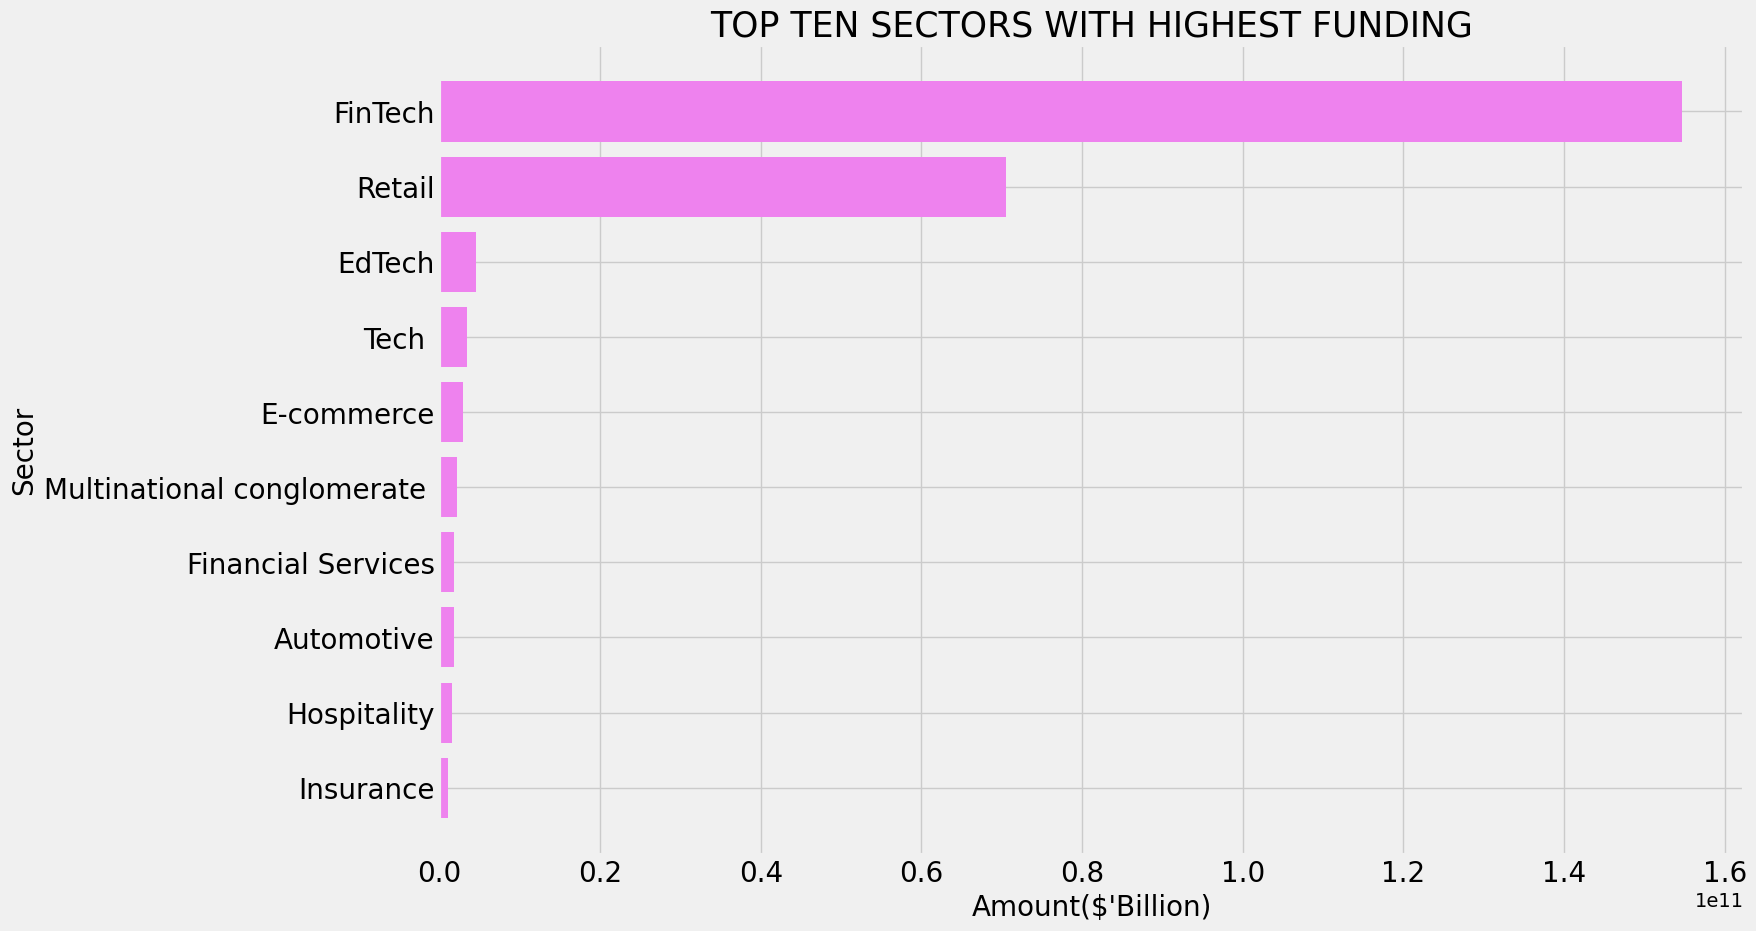

In [193]:
ten_top_industries = indian_startup.groupby("Sector")["Amount($)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 10))
plt.barh(ten_top_industries.index, ten_top_industries.values, color="violet")
plt.title("TOP TEN SECTORS WITH HIGHEST FUNDING", fontsize=25)
plt.xlabel("Amount($'Billion)", fontsize=20)
plt.ylabel("Sector", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().invert_yaxis()
plt.show()



### Ten(10) sectors with the least funding from investors

In [194]:
least_funded_industry = pd.DataFrame(indian_startup.groupby("Sector")["Amount($)"].sum())
least_funded_industry = least_funded_industry.sort_values(by="Amount($)", ascending=False).tail(156)
least_funded_industry['Amount($)'] = least_funded_industry['Amount($)'].apply(lambda x: math.ceil(x))

In [195]:
# Remove 0 from Amount column. This is because NaN and undisclosed amounts were replaced with 0

least_Funded_industry = least_funded_industry[(least_funded_industry["Amount($)"] != 0)]
least_Funded_industry

Amount($)
Sector                                                       
Artificial Intelligence, Drones, Navigation, Pa...      20000
Mobile, Software, Travel                                18000
Artificial Intelligence, Information Technology         18000
Digital Media, Internet, Media and Entertainmen...      15000
B2B, Biometrics, Cyber Security, Fraud Detectio...      10000
Internet of Things, Waste Management                     7500
Food and Beverage, Food Delivery, Internet               7500
Education, Information Technology, Internet, Mo...       1500
Digital Marketing, SEM, SEO, Web Development             1500
Automotive, Electric Vehicle, Energy Storage              900

## Q2.  What are the top five (5) cities with the most start-ups?

#### We outline the top five (5) cities that have the highest start-up establishments

In [196]:
# Remove Uknown from Location columns
df = indian_startup[indian_startup["Location"]!="Unknown"]

# Create Dataframe to show five(5) cities with most startups
top_five_cities = pd.DataFrame(df["Location"].value_counts().head())
top_five_cities

Location
Bengaluru       917
Mumbai          468
Gurgaon         318
New Delhi       318
Chennai         106

#### Plotting the top(5) cities with the most startups

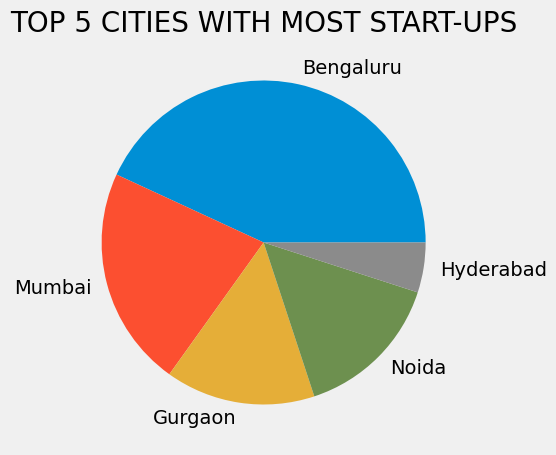

In [197]:
top_5_cities = df["Location"].value_counts().head() 

plt.figure(figsize=(10, 5))
plt.pie(top_5_cities, labels=df["Location"].head(), data=df["Location"].value_counts())
plt.title("TOP 5 CITIES WITH MOST START-UPS", fontsize=20)
plt.show()

## Q3. What are the top ten(10) startups with the most funding?
 

#### We look at the ten(10) start-ups with the most funding

In [198]:
top_startups = indian_startup.groupby("Company")["Amount($)"].sum()
top_startups = top_startups.sort_values(ascending=False).reset_index()
top_startups["Amount($)"] = top_startups["Amount($)"].apply(lambda x: math.ceil(x))
top_startups.head(10)

Company     Amount($)
0               Alteria Capital  150000000000
1  Reliance Retail Ventures Ltd   70000000000
2                        Byju's    3112000000
3                     Snowflake    3000000000
4                      Reliance    2200000000
5                        Swiggy    1956000000
6              VerSe Innovation    1550000000
7                  Dream Sports    1240000000
8                        Zomato    1239000000
9                           OYO     965000000

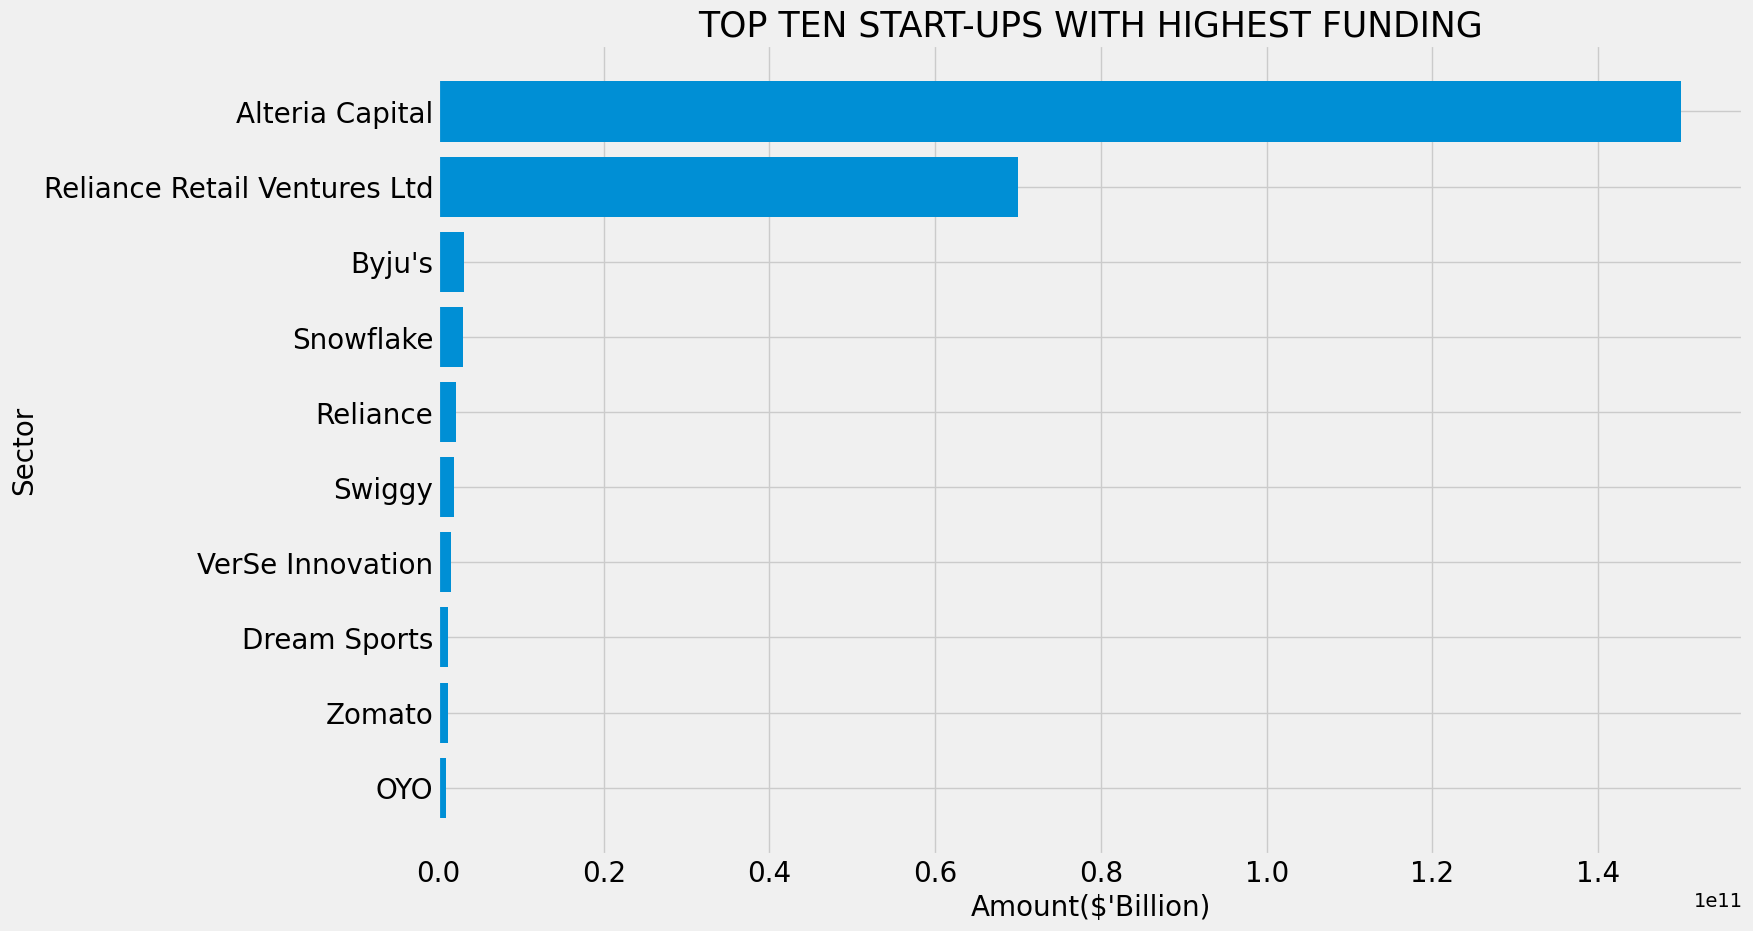

In [199]:
ten_top_startups = indian_startup.groupby("Company")["Amount($)"].sum()
ten_top_startups = ten_top_startups.sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 10))
plt.barh(ten_top_startups.index, ten_top_startups.values)
plt.title("TOP TEN START-UPS WITH HIGHEST FUNDING", fontsize=25)
plt.xlabel("Amount($'Billion)", fontsize=20)
plt.ylabel("Sector", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().invert_yaxis()
plt.show()


## Q4. What are the top ten(10) investors by number of investments?

#### We look at the top ten(10) investors who made the highest number of investments.

In [200]:
# Remove Unknown from Investor column for analysis
investors = indian_startup[indian_startup["Investor"]!="Unknown"]

top_10_investors = pd.DataFrame(investors["Investor"].value_counts().head(10))
top_10_investors

Investor
Inflection Point Ventures        34
Venture Catalysts                32
Mumbai Angels Network            17
Angel Investors                  13
Tiger Global                     12
Titan Capital                    11
Unicorn India Ventures           10
Sequoia Capital India             9
Alteria Capital                   9
Better Capital                    9

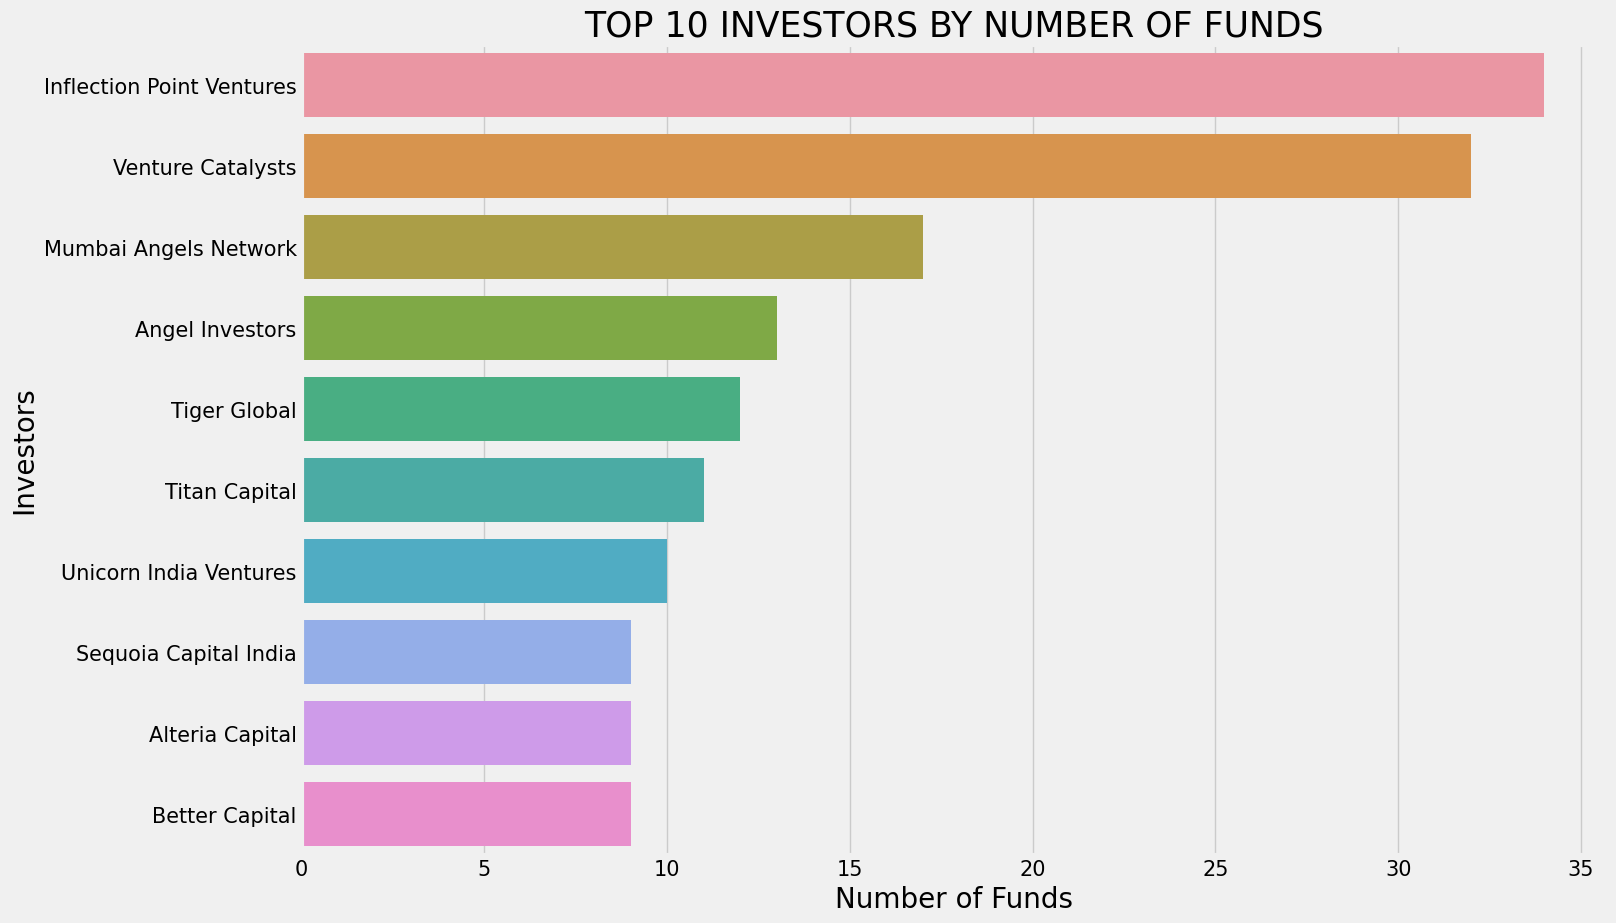

In [201]:
top_10_investors = investors["Investor"].value_counts().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(top_10_investors.values, top_10_investors.index)
plt.title("TOP 10 INVESTORS BY NUMBER OF FUNDS", fontsize=25)
plt.xlabel("Number of Funds", fontsize=20)
plt.ylabel("Investors", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 5. What is the trend of funding in the Indian start-up ecosystem in the referenced year?

#### We seek to discover the trend of funding to know if funding is appreciating, reducing or stable.

In [202]:
funding_trend = indian_startup.groupby("Funding_year")["Amount($)"].sum()
funding_trend = funding_trend.reset_index()
funding_trend["Amount($)"] = funding_trend["Amount($)"].apply(lambda x: math.ceil(x))
funding_trend

Funding_year     Amount($)
0          2018    6675525141
1          2019    3336433200
2          2020   90930476656
3          2021  179407526000

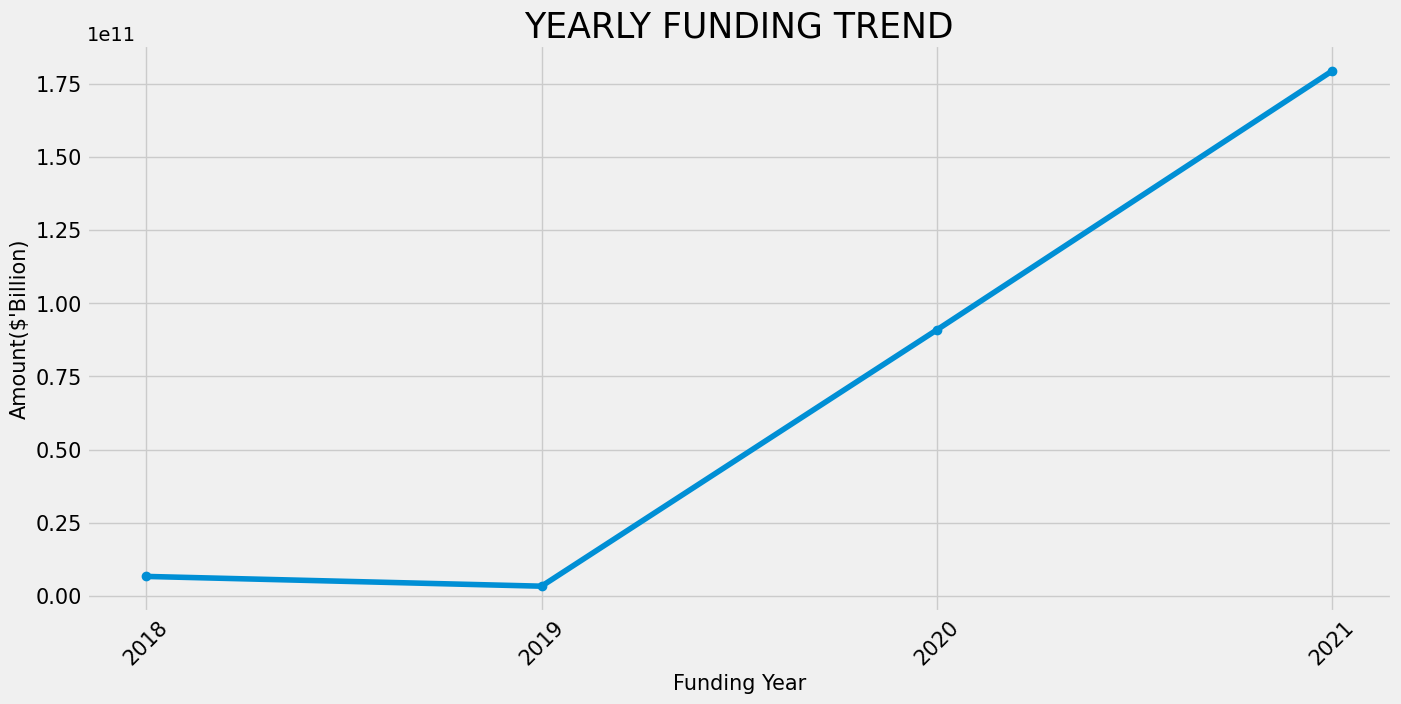

In [203]:
trend = indian_startup.groupby("Funding_year")["Amount($)"].sum()

plt.figure(figsize=(15, 7))

plt.plot(trend.index, trend.values, marker="o")
plt.title("YEARLY FUNDING TREND", fontsize=25)
plt.xlabel("Funding Year", fontsize=15)
plt.ylabel("Amount($'Billion)", fontsize=15)
plt.xticks(trend.index, fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()

#### Calculating the percentage change in funding respectively with the funding years

In [204]:
# The total yearly funds was from our earlier calculations in the funding trend.
funding_2018 = 6429010902
funding_2019 = 3335433200
funding_2020 = 90930476656
funding_2021 = 179407526000

print(f"Percentage Change in 2019 was {(((funding_2019 - funding_2018) / funding_2019) * 100):.2f}%")
print(f"Percentage Change in 2020 was {(((funding_2020 - funding_2019) / funding_2020) * 100):.2f}%")
print(f"Percentage Change in 2021 was {(((funding_2021 - funding_2020) / funding_2021) * 100):.2f}%")

Percentage Change in 2019 was -92.75%
Percentage Change in 2020 was 96.33%
Percentage Change in 2021 was 49.32%


## Q6. Which stage of funding did startups receive the most funds?

### We analyze the stage of investment where investors released the most funds to start-ups.

In [205]:
# Remove unknown from stage column for analysis
stage = indian_startup[indian_startup["Stage"] != "Unknown"]

funded_stage = indian_startup.groupby(stage["Stage"])["Amount($)"].sum()
funded_stage = funded_stage.sort_values(ascending=False).reset_index().head(10)
funded_stage["Amount($)"] = funded_stage["Amount($)"].apply(lambda x: math.ceil(x))
funded_stage

Stage     Amount($)
0  Debt Financing  150587432000
1        Series C    5390497700
2        Series B    3761189200
3        Series D    3528814000
4        Series E    3433153000
5        Series A    2850861900
6        Series H    2312500000
7  Private Equity    2063400000
8        Series F    1703200000
9            Seed     933039491

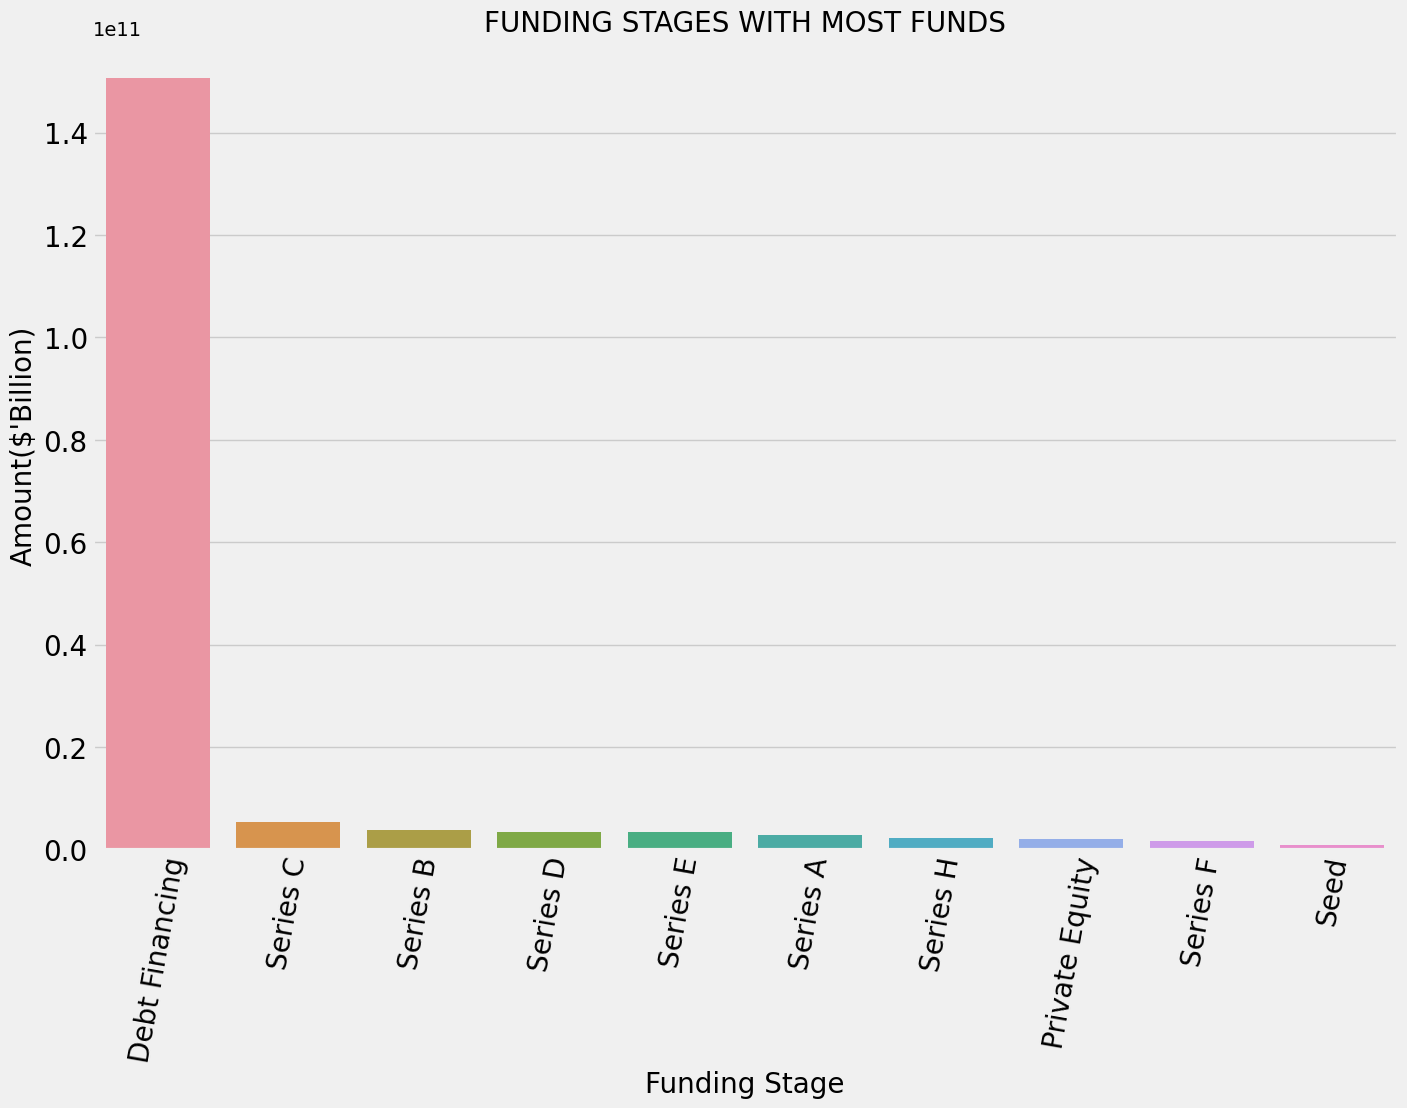

In [206]:
plt.figure(figsize=(15, 10))

fundedstage = indian_startup.groupby(stage["Stage"])["Amount($)"].sum().sort_values(ascending=False).head(10)

sns.barplot(fundedstage.index, fundedstage.values)
plt.title("FUNDING STAGES WITH MOST FUNDS", fontsize=20)
plt.xlabel("Funding Stage", fontsize=20)
plt.ylabel("Amount($'Billion)", fontsize=20)
plt.xticks(fontsize=20, rotation=80)
plt.yticks(fontsize=20)
plt.show()

## Q7. Which Investors invested the biggest funds in identified Sectors

#### We seek to find out the leading investors who made huge investments in sectors. It is worthy to note that the Investor column is highly likely to contain multiple investors

#### Remove "Unknown" values from the Investor column

In [207]:
invest = indian_startup[indian_startup["Investor"] != "Unknown"]

In [208]:
investors = indian_startup.groupby([(invest["Investor"]), "Sector"])["Amount($)"].sum().apply(lambda x: math.ceil(x))
inv = investors.sort_values(ascending=False).reset_index()
inv.head()

Investor  \
0           Silver Lake, Mubadala Investment Company   
1    Salesforce Ventures, Dragoneer Investment Group   
2                 Facebook, Google, KKR, Silver Lake   
3  Canaan Valley Capital, Glade Brook Capital Par...   
4  Bertelsmann India Investments, Sequoia Capital...   

                        Sector    Amount($)  
0                       Retail  70000000000  
1                        Tech    3000000000  
2  Multinational conglomerate    2200000000  
3        Innovation Management   1000000000  
4                    Education    850000000

## Q8. Which Cities received the highest funding

Here, we seek to know the cities that received the highest funding from investors.

In [209]:
# Remove unknown values from the Location column

city = indian_startup[indian_startup["Location"] != "Unknown"]

In [210]:
city_funding = indian_startup.groupby(city["Location"])["Amount($)"].sum()
city_funding = city_funding.sort_values(ascending=False).reset_index()
city_funding["Amount($)"] = city_funding["Amount($)"].apply(lambda x: math.ceil(x))

In [211]:
# Remove California from values in Location column since we are only concerned about cities in India

city_Funding = city_funding[city_funding["Location"] != "California"]
city_Funding.head(10)

Location     Amount($)
0      Mumbai  231547240543
1   Bengaluru   23978580854
2     Gurgaon    6966539000
3   New Delhi    4255150210
5        Pune    1396266145
6     Haryana    1249729800
7     Chennai    1124040146
8       Noida     590707000
9      Jaipur     585125000
10  Hyderabad     409197000

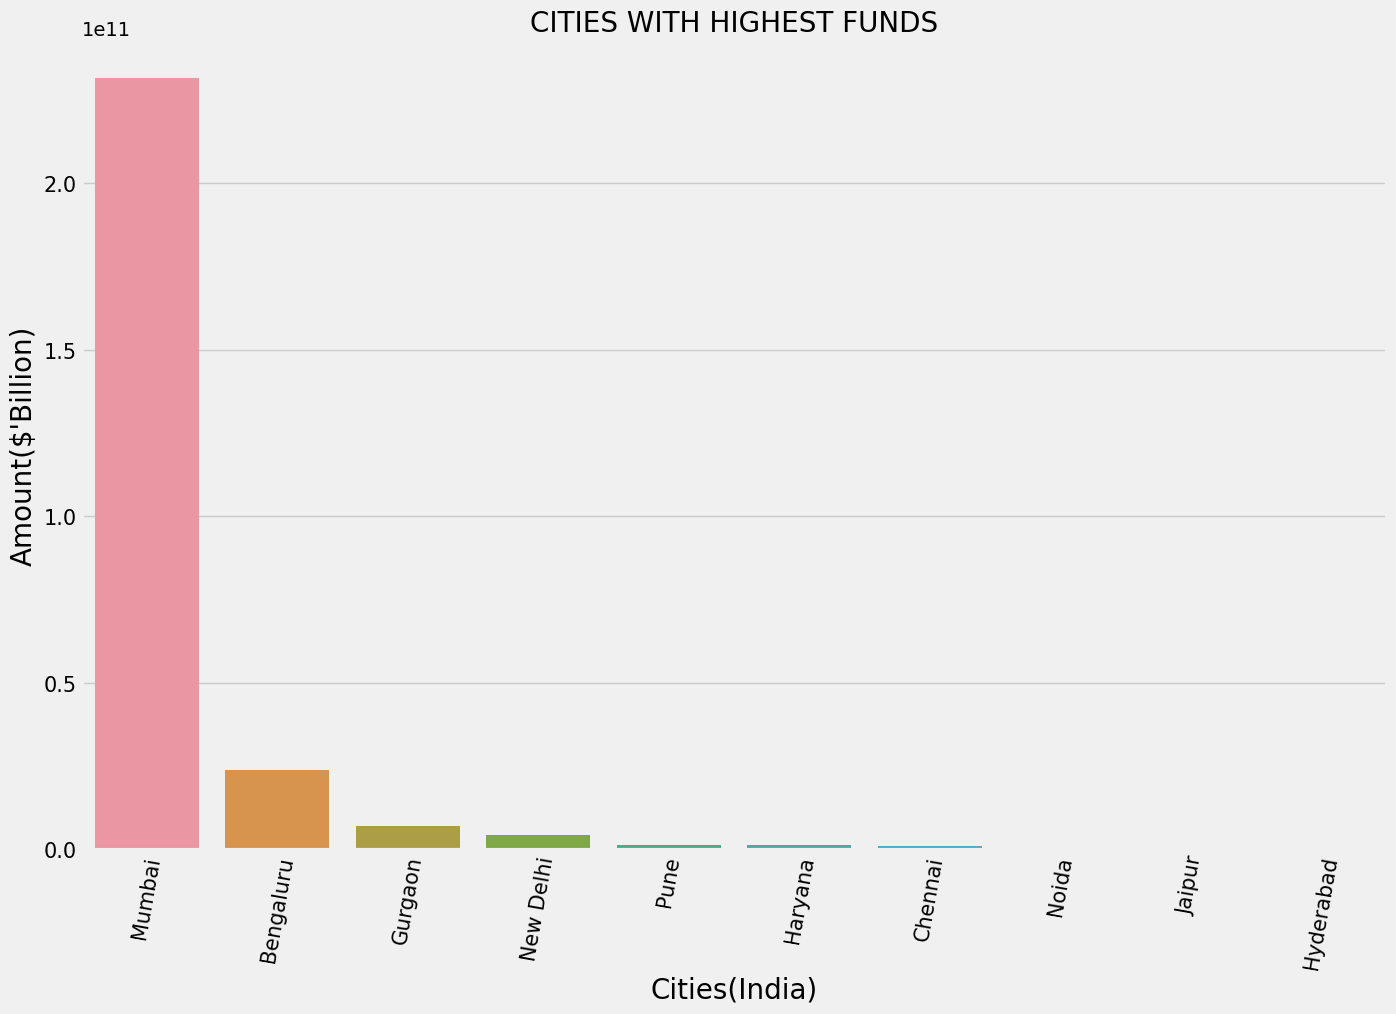

In [212]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Location", y="Amount($)", data=city_Funding.head(10))
plt.title("CITIES WITH HIGHEST FUNDS", fontsize=20)
plt.xlabel("Cities(India)", fontsize=20)
plt.ylabel("Amount($'Billion)", fontsize=20)
plt.xticks(fontsize=15, rotation=80)
plt.yticks(fontsize=15)
plt.show()

### Q9. Average amount a startup is likely to receive as funding

We want to know the average amount our startup is likely to receive as total funding throughout the entire stages of funding

In [213]:
number_of_startups = indian_startup["Company"].count()
total_funding = indian_startup["Amount($)"].sum()

In [214]:
print(f"Average Amount a startup is likely to receive as funding is US${(total_funding / number_of_startups):.2f}")

Average Amount a startup is likely to receive as funding is US$98402934.71


## Q10. Average amount a startup is likely to receive as Seed Fund

We try to acertain the amount our start-up is likely to receive at the beginning stages as a seed fund.

In [215]:
seed_amount = (indian_startup[indian_startup.Stage == "Seed"])["Amount($)"].sum()
seed_startups = len((indian_startup[indian_startup.Stage == "Seed"]))
average_seed_amount = seed_amount / seed_startups

In [216]:
print(f"Average Amount a startup is likely to receive as Seed Fund is US${average_seed_amount:.2f}")

Average Amount a startup is likely to receive as Seed Fund is US$1532084.55


# INSIGHTS

### The following are the insights that we gained from our analysis

There are 2852 start-ups funded for the period and total funding received by start-ups was 
US$ 280,102,446,757.83

1. The top sectors that received the most funding were;
- FinTech
- Retail
- EdTech

2. The top cities were most startups were been established were:
- Bengaluru(919)
- Mumbai(468)
- Gurgaon(318)
- New Delhi(318)

3. These startups received the most funding from investors:
- Alteria Capital
- Reliance
- Byju's

4. These were the top investors who made the highest number of investments
- Inflection Point Ventures
- Venture Catalysts
- Mumbai Angel Network

5. From our analysis we found out that funding trend was generally positive.
- In 2019, funding drastically reduced at a rate of 92.74%
- In 2020, there was an appreciation of funding. Investors increased funding at rate of 96.33%
- In 2021, the funding momentum rose again by 49.31%

6. The commonst investment stage that investors made the highest number of funds available were:
- Seed round
- Series A
- Pre-series A

7. These funding stages received much attention from investors.
- Debt Financing
- Series C
- Series B
- Series D

8. These investors were the biggest investors who invested most funds in a particular sector:
- Silver Lake, Mubadala Investment Company
- Salesforce Ventures, Dragoneer Investment Company
- Facebook, Googel, Silver Lake
- Sequoia Capital

9. These are the cities that received the highest amount in funding from investors:
- Mumbai
- Bengaluru
- Gurgaon
- New Delhi

# RECOMMENDATIONS

The Indian start-up ecosystem is experiencing an increasing momnetum. The timing for penetration into the ecosystem is right. 

From our analysis, the trend of funding has been increasing at a steady rate. With a total number of startups for the recorded period being 2852, the average amount a startup is likely to receive as total fund is US$ 98,212,639.12. This means that competition for funding is not very intense. Investors are ready to invest in a promising startup.

We therefore recommend the following;

- The company should consider establlishing in Bengaluru, Mumbai, New Delhi and Gurgaon. These cities have the most start-ups. A startup in these cities is also likely to receive significant amount of funding.


- The company is right to seek funding in the early stages. Most investors favored investing during the Seed and Series A rounds. The average amount a company is likely to recieve as seed fund is 
US$ 1,509,049.45


- Companies seeking fuding should consider seeking funding from Sequoia Capital, Inflection Point Ventures, Venture Catalysts, Silver Lake, Mumbai Angel Network and Venture Catalysts. These investors invested in a couple of startups and raised higher amount of funds.


- The company should consider establishing a startup in Fintech, Retail, E-commerce and EdTech as these sectors are most favored by investors with higher number of investments and huge inflow of funds.